In [ ]:
# Install IRkernel
# install.packages('IRkernel')
# IRkernel::installspec()

In [4]:
options(repr.plot.width = 16, repr.plot.height = 7)

In [5]:
Zn<-rnorm(100,0,1); Zn

[1] -0.31083218 -0.78151582  0.09859879  0.39842239  0.71326462 -0.03403699
  [7] -0.82920871 -0.02768507  1.23406360  0.99892683 -0.18520089 -0.53249094
 [13] -0.05479595 -0.32147155  0.43037401 -1.15180294  1.37973436  0.16521869
 [19] -0.81751090 -0.01316194  0.44393156  1.20617171 -0.68740694 -1.86987705
 [25] -1.37684894  0.62211542 -0.98092579  0.37602062 -0.28477002  1.07563702
 [31] -1.50460077  0.08603053  0.05776157 -0.94185956 -1.34799579 -0.80546434
 [37]  0.35713067  0.60237024 -0.44778814 -0.55590866  0.18077978  0.81761419
 [43] -2.10100409 -0.26231803 -0.32807055 -0.29311708  1.60166335 -0.31601531
 [49] -0.01086190 -0.53378665  1.48865088  0.02583970  0.58831486  0.94771528
 [55]  0.87405091 -0.29442972  0.30294472 -0.61715870 -0.45768279 -0.11269863
 [61]  0.93014523 -0.10296151 -0.65984711  0.59973373 -1.51159527  1.01346656
 [67]  0.13006487  1.43660499  0.32081499  2.25573848 -0.11964309 -0.51317926
 [73]  0.38105273  0.88626850 -1.05946359  0.75932465 -0.47258224 -1.21364539
 [79] -1.27660922  1.64363767 -0.81068487 -2.05373207  0.59602032  0.45571071
 [85] -1.28178712  2.08747821 -0.55660428 -1.29639498 -0.75845210  0.92268366
 [91] -0.51458245 -1.47029585 -0.09518493 -1.21490665 -0.14465888 -0.52602222
 [97] -0.10378062 -0.24669914  0.10278224  1.40265514

In [6]:
library(zoo)
Zn<-zoo(rnorm(5,0,1)); lag(Zn,-1, na.pad= TRUE)

         1          2          3          4          5 
        NA  0.2968768  0.1508260 -0.5574878  0.2800398 

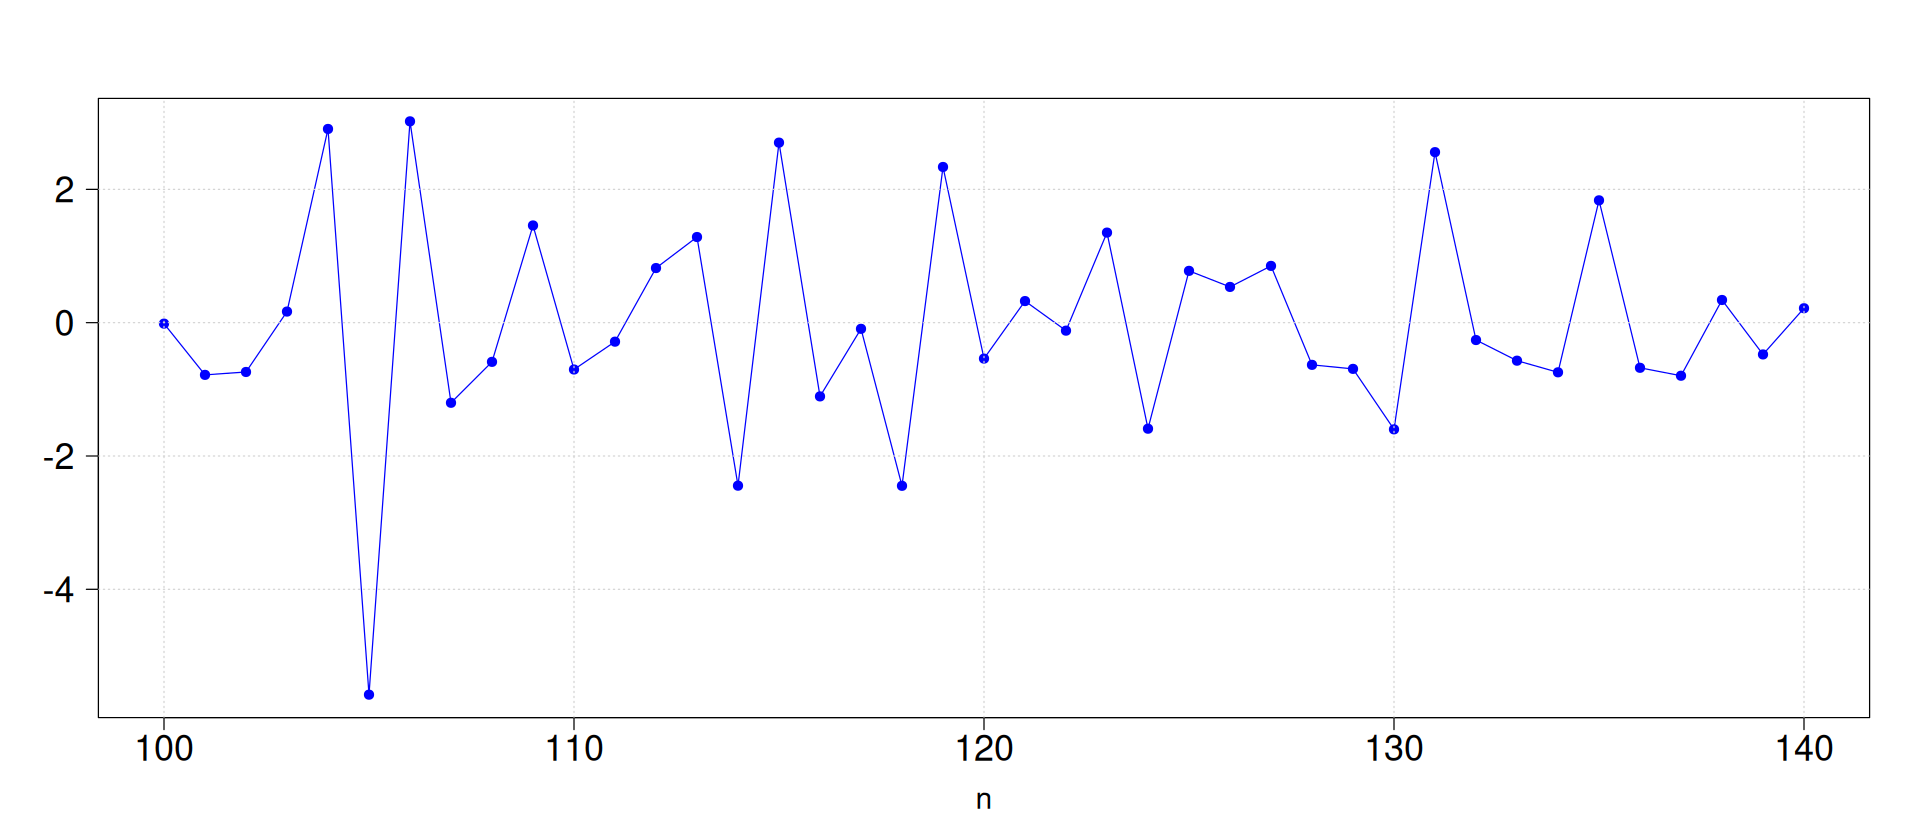

In [7]:
n=41;ma<-arima.sim(model=list(ma=c(-.7,.1)),n.st=100,n)
x=seq(100,100+n-1); # dev.new(width=12,height=6)
plot(x,ma,pch=19,ylab='',xlab='n',main='',col='blue',cex.axis=1.8,cex.lab=1.5,las=1)
lines(x,ma,col='blue');grid()

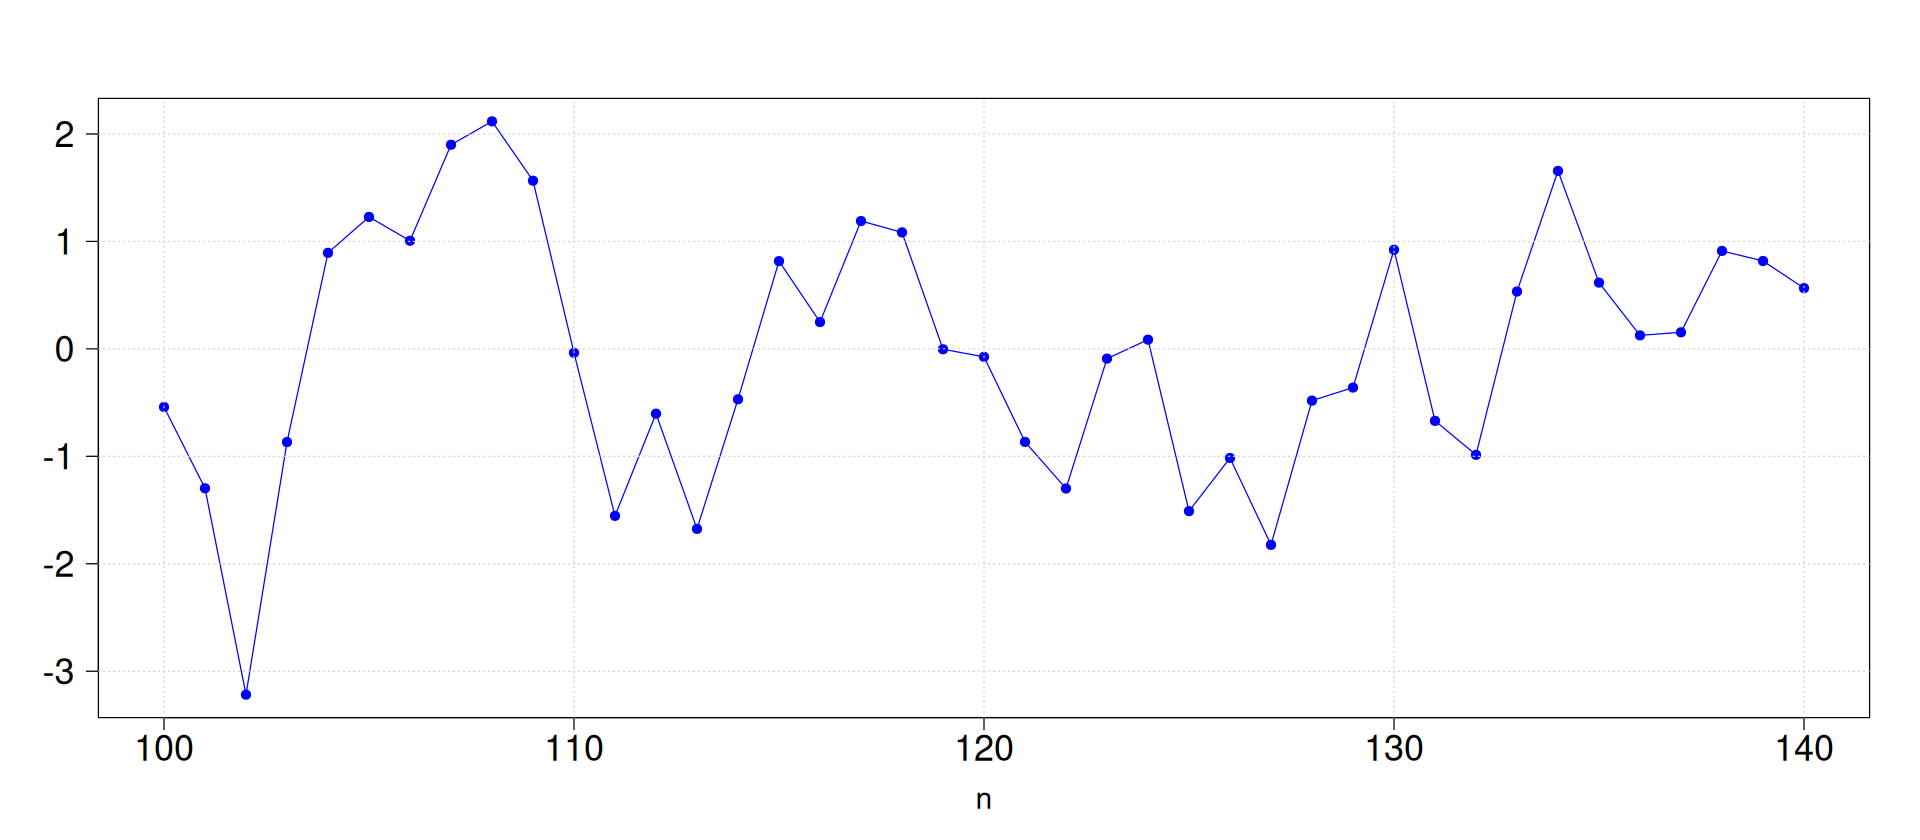

In [9]:
n=41;ar.sim<-arima.sim(model=list(ar=c(.9,-.2)),n.st=100,n)
x=seq(100,100+n-1); # dev.new(width=12,height=6)
plot(x,ar.sim,pch=19,ylab='',xlab='n',main='',col='blue',cex.axis=1.8,cex.lab=1.5,las=1)
lines(x,ar.sim,col='blue');grid()

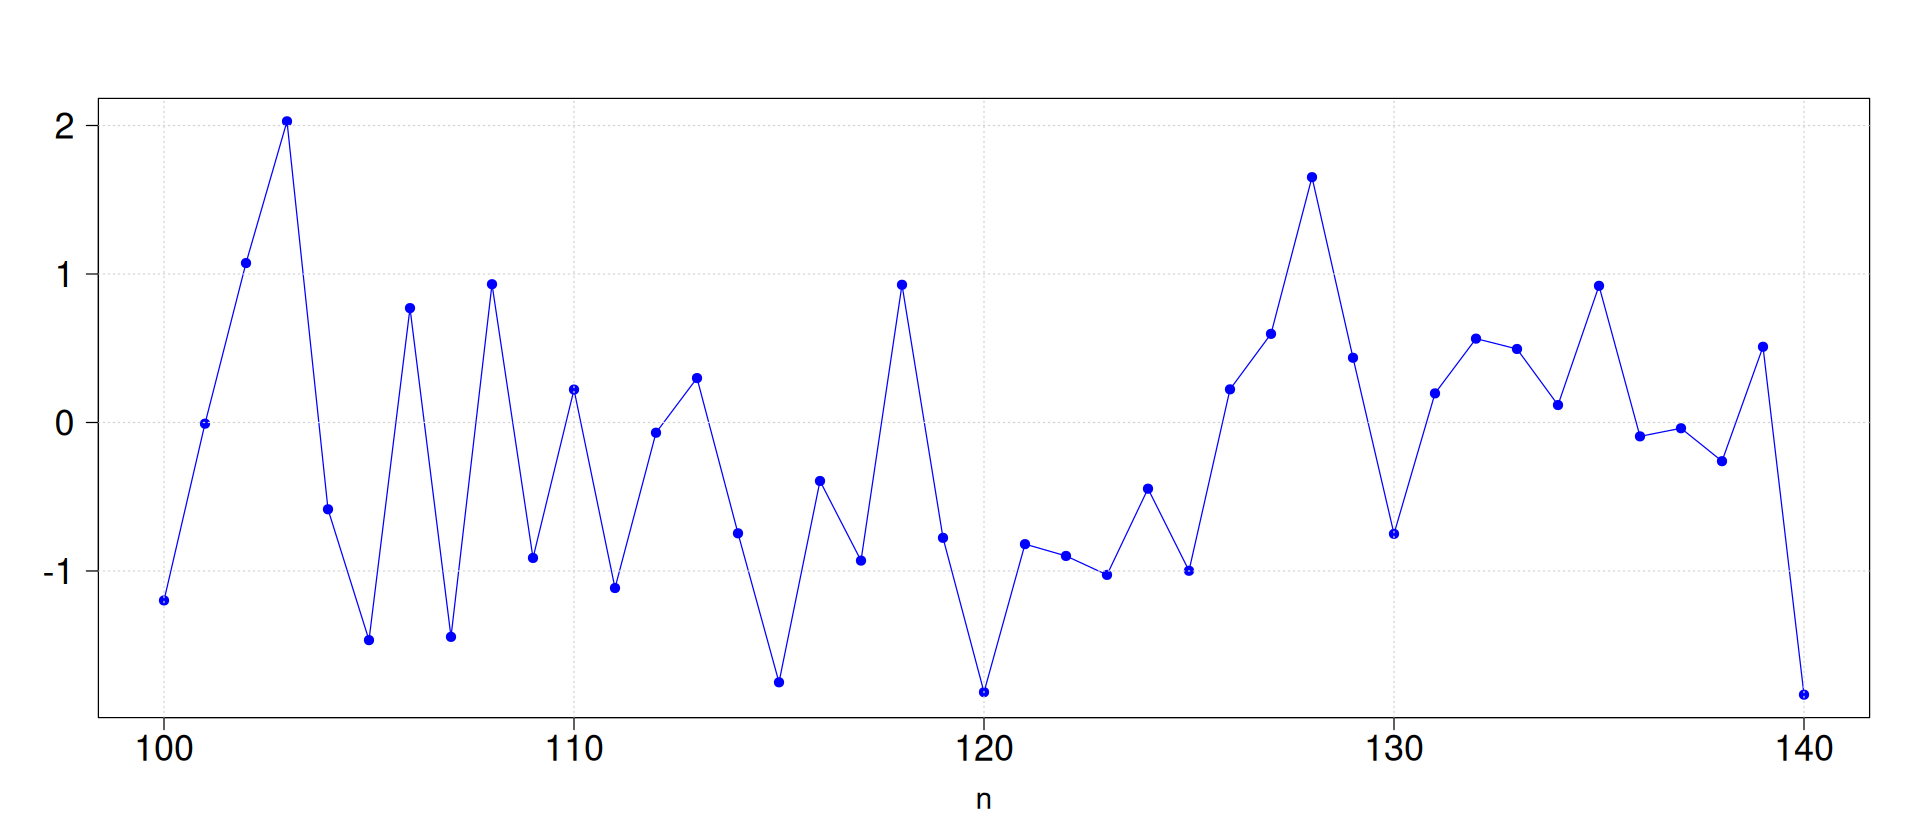

In [10]:
n=41; arma.sim<-arima.sim(model=list(ar=c(.9,-.2),ma=c(-.7,.1)),n.st=100,n)
x=seq(100,100+n-1); # dev.new(width=12,height=6)
plot(x,arma.sim,pch=19,ylab='',xlab='n',main='',col='blue',cex.axis=1.8,cex.lab=1.5,las=1)
lines(x,arma.sim,col='blue');grid()

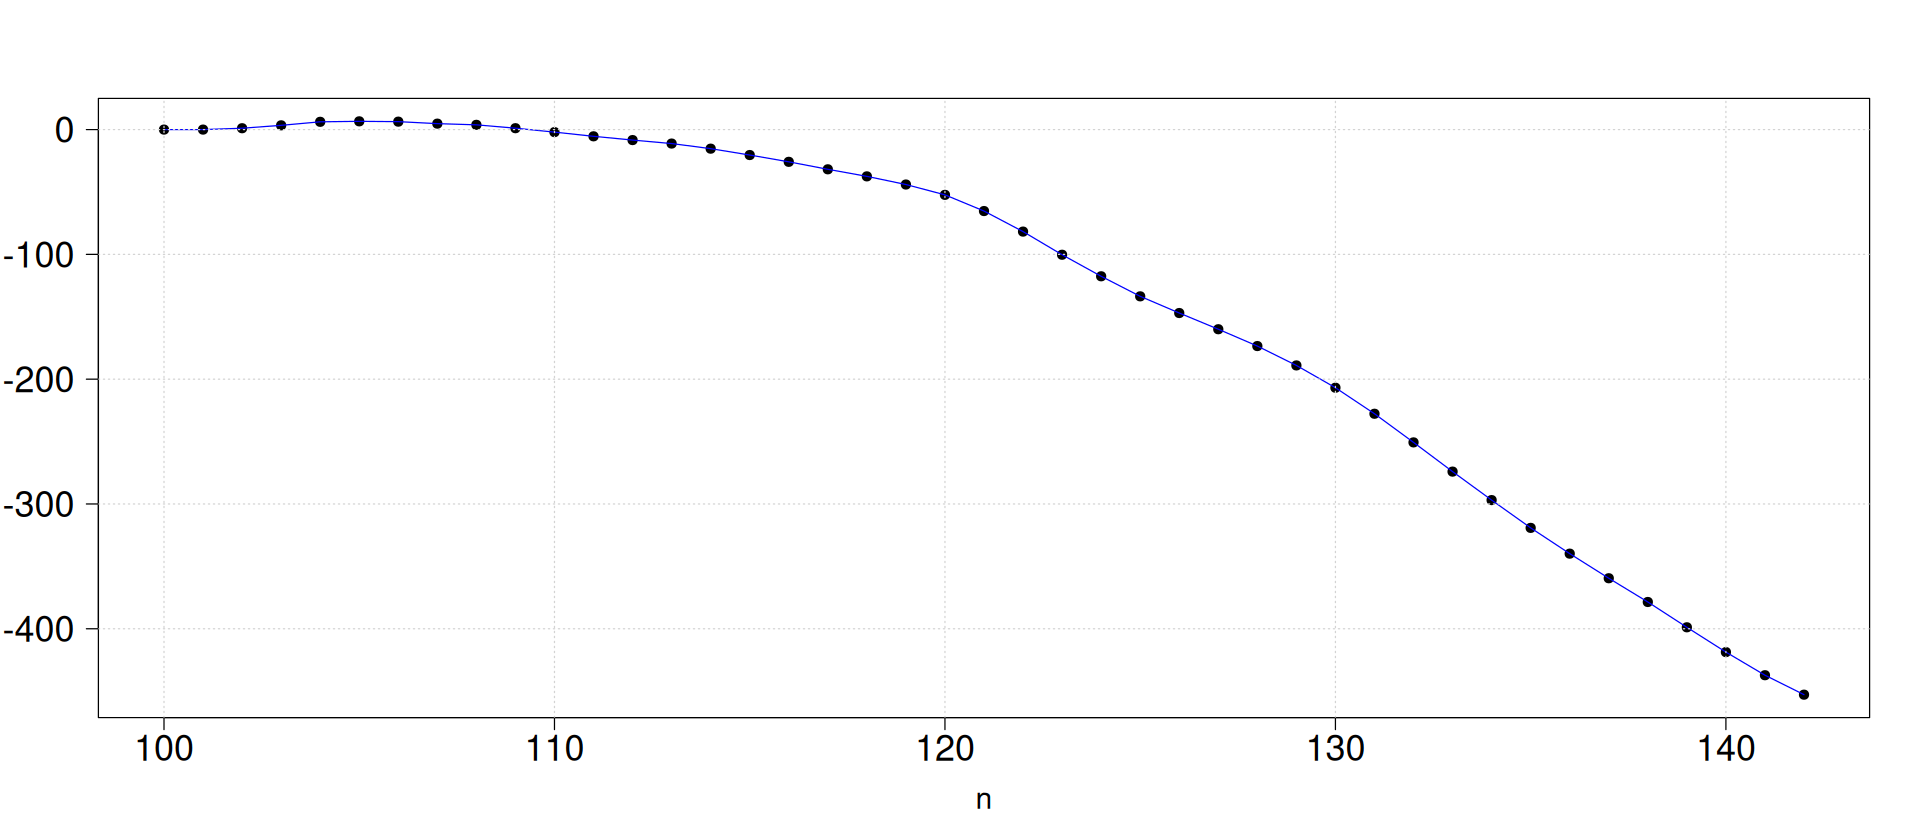

In [11]:
n=41;d=2;arima.s<-arima.sim(model=list(ar=c(.5),ma=c(.5,.5,-.5), order=c(1,d,3)), n.st=100,n)
x=seq(100,100+n+d-1); # dev.new(width=12,height=6)
plot(x,arima.s,pch=19, ylab='', xlab='n', main= paste("", sep=' '),cex.axis=1.8,
cex.lab=1.5,las=1); lines(x,arima.s,col='blue');grid()

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



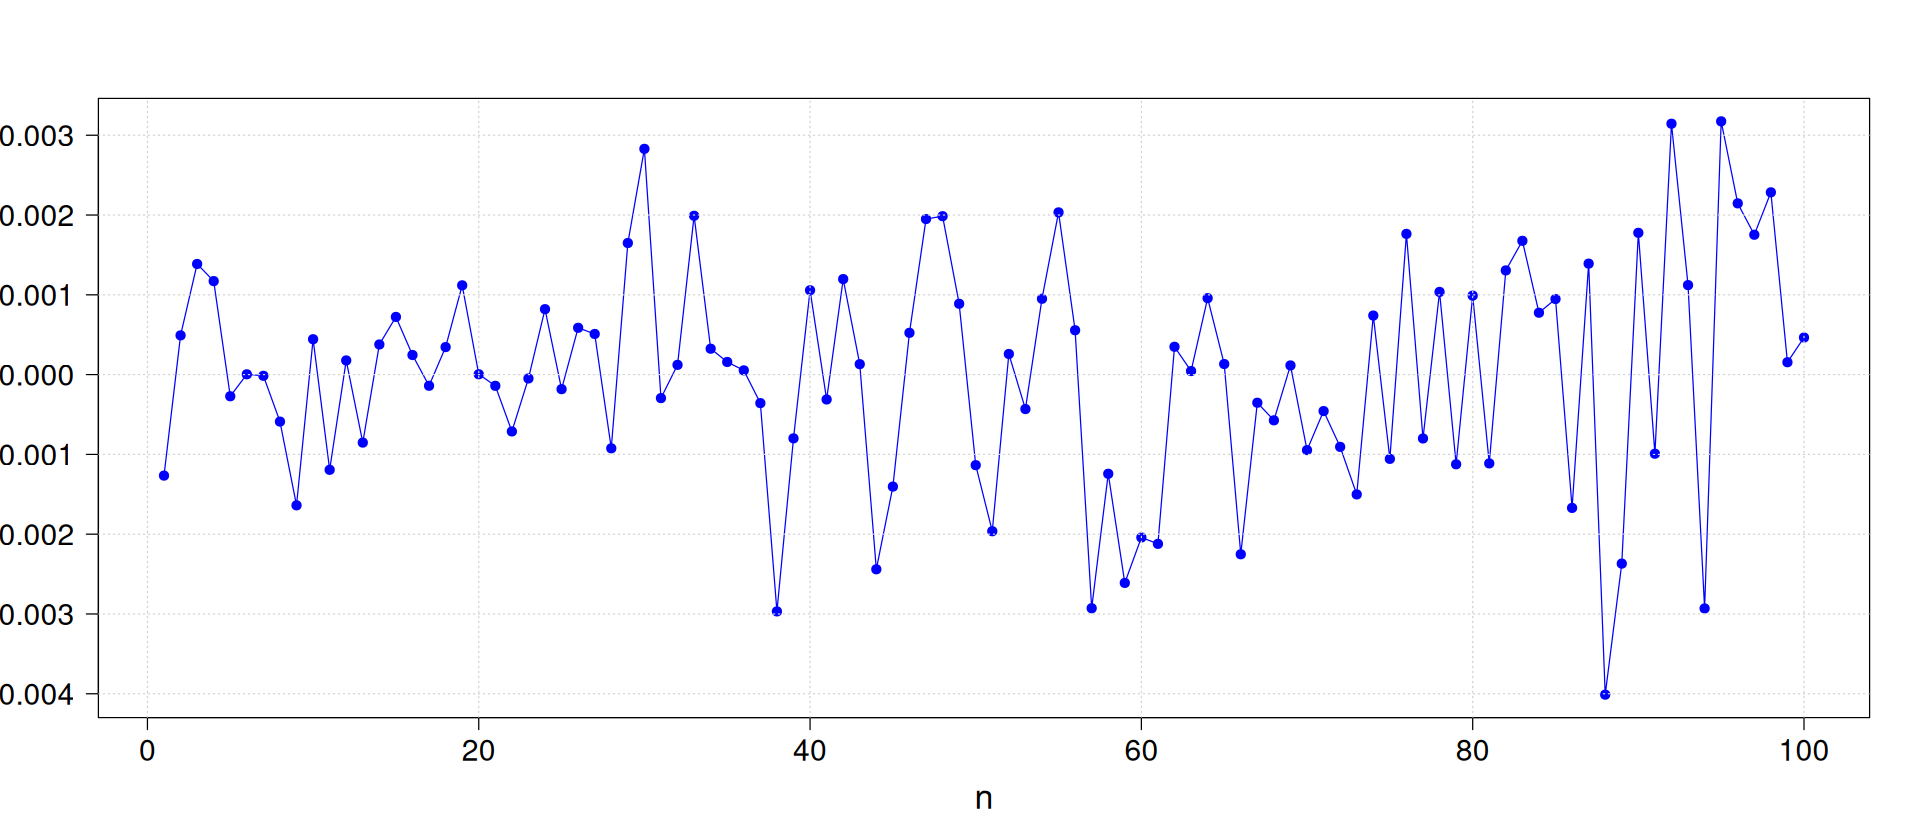

In [12]:
library(fGarch); arch.spec<-garchSpec(model=list(alpha0= 1e-5,alpha=c(.2,.4),beta= 0))
n=100; arch.sim<-garchSim(arch.spec,n); x=seq(1,n); # dev.new(width=12,height=6)
plot(x,arch.sim,pch=19,ylab='',xlab='n',main='',col='blue',cex.axis=1.5,cex.lab=1.7,las=1)
lines(x,arch.sim,col='blue');grid()

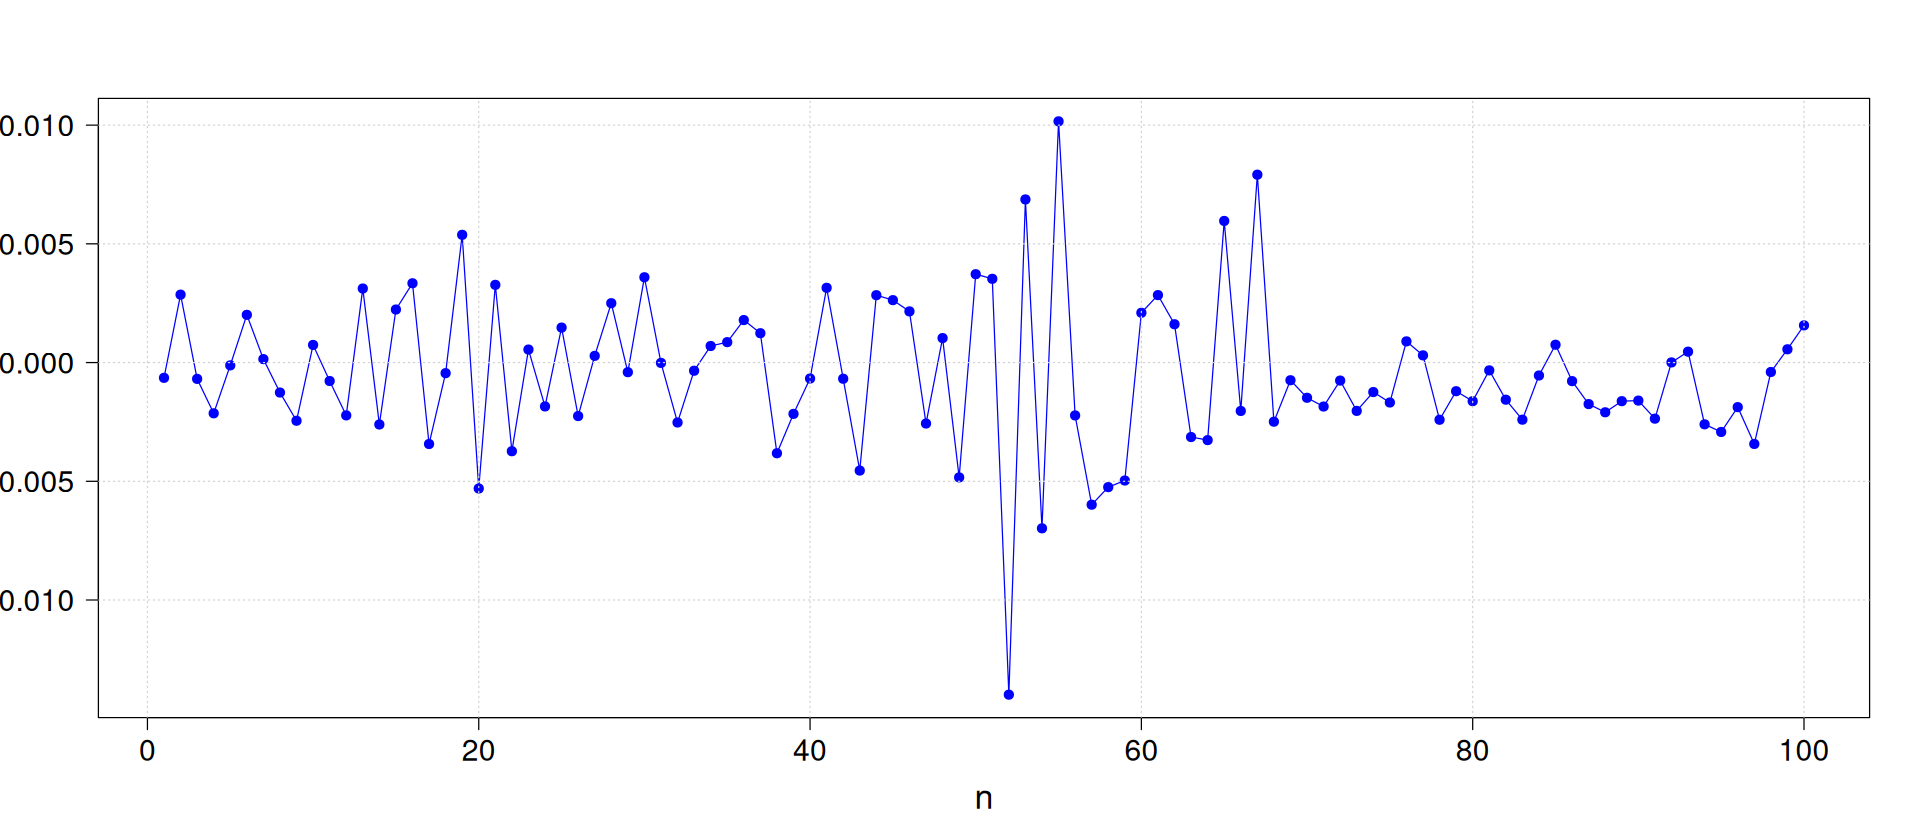

In [13]:
library(fGarch); garch.sp<-garchSpec(model=list(alpha0= 1e-5,alpha=c(.2,.4),beta=c(.3)))
n=100; garch.sim<-garchSim(garch.sp,n); x=seq(1,n); # dev.new(width=12,height=6)
plot(x,garch.sim,pch=19,ylab='',xlab='n',main='',col='blue',cex.axis=1.5,cex.lab=1.7,las=1);
lines(x,garch.sim,col='blue');grid()

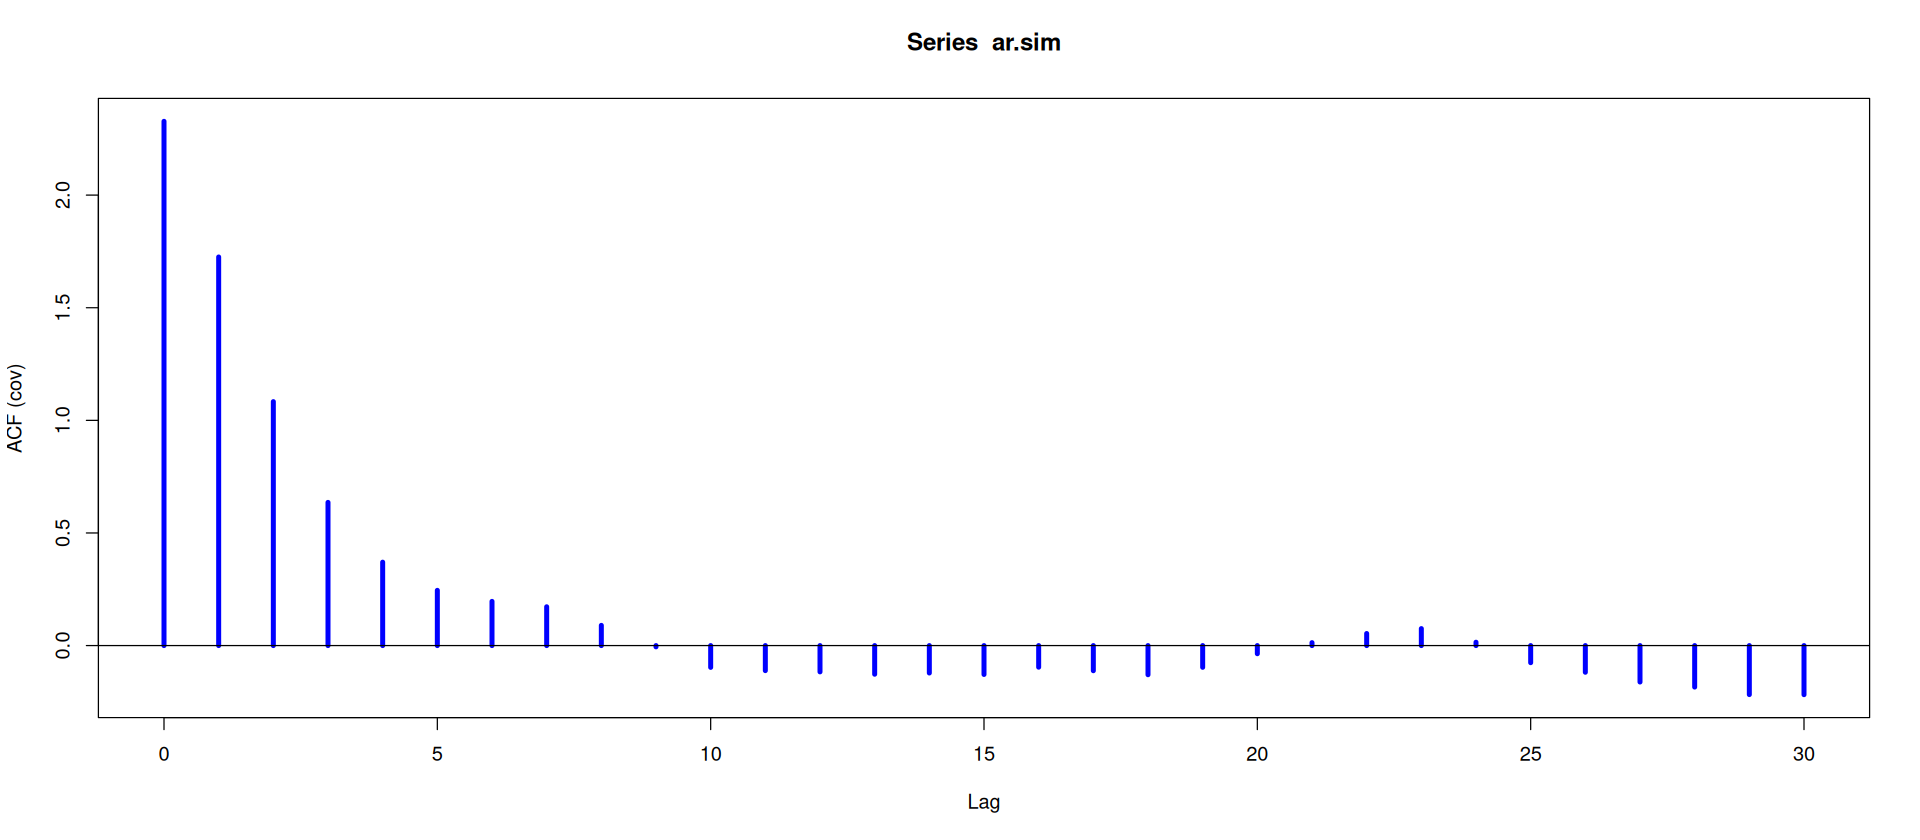

In [14]:
n=1000; ar.sim<-arima.sim(model=list(ar=c(.9,-.2)),n.st=100,n)
ar.acf<-acf(ar.sim,type="covariance",plot=T,col='blue',lwd=4); dev.new(width=12,height=6)
ar.ccf<-ccf(ar.sim,ar.sim,type="covariance",plot=T,lwd=4,col='blue',main='',cex.axis=1.8,
cex.lab=1.5,las=1);grid()

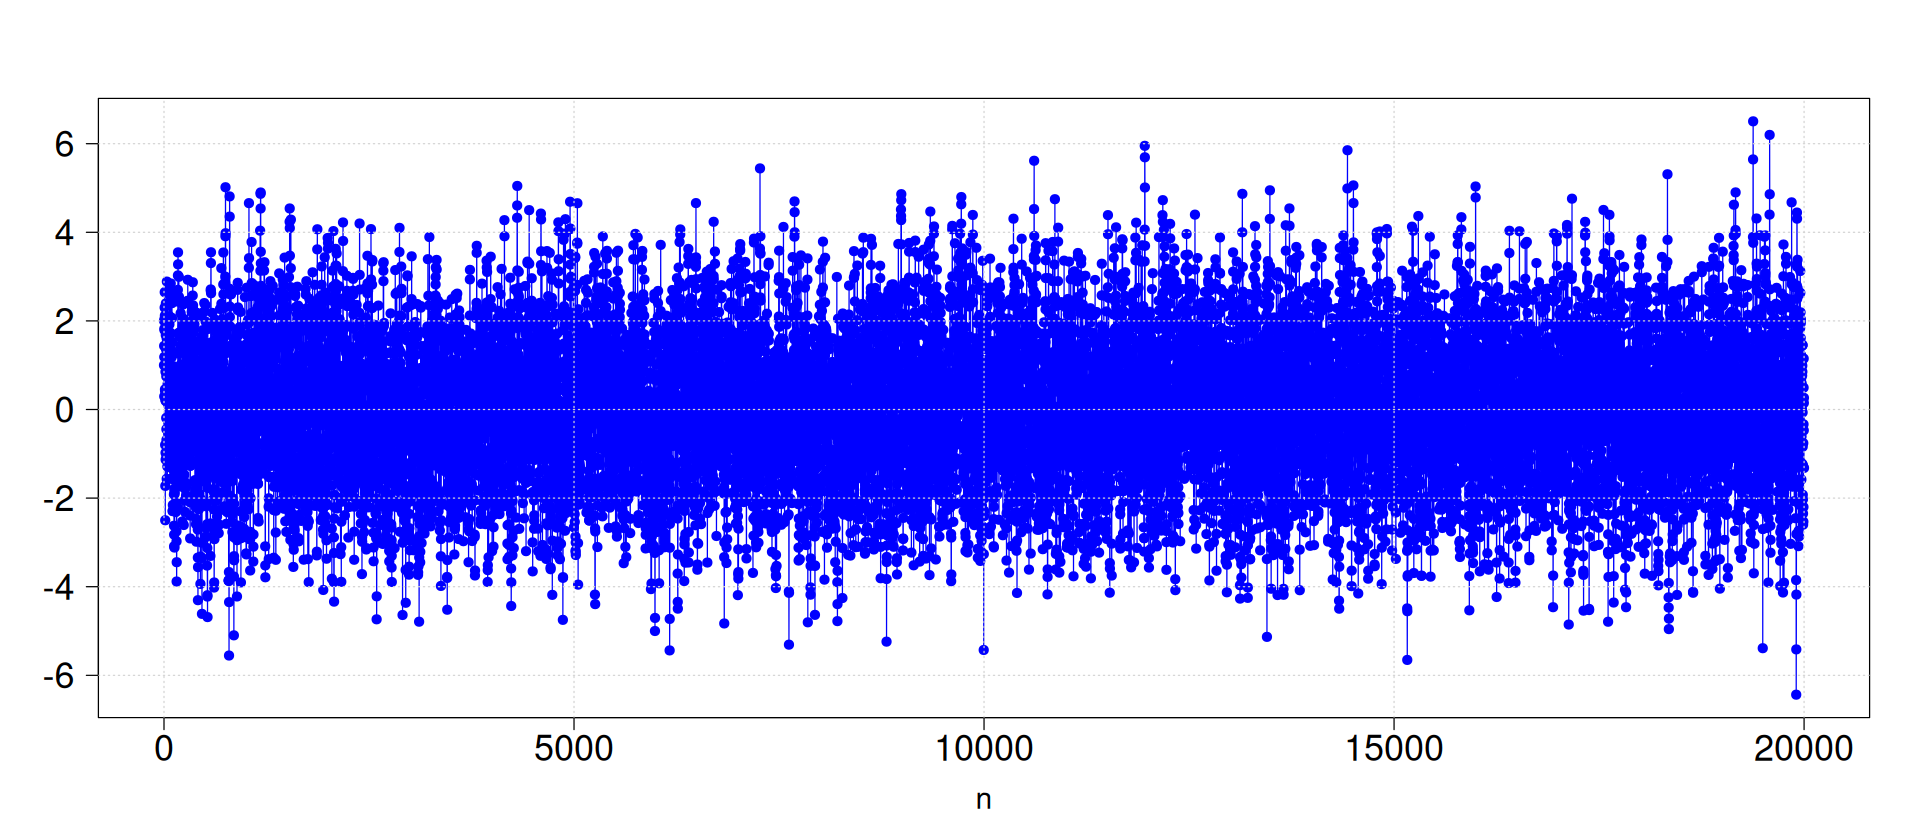

In [16]:
N=20000;t=0:(N-1);a1=.9;a2=-.2;X=c(1,N);X[1]=1;X[2]=2; # dev.new(width=12,height=8)
ar.sim=arima.sim(model=list(ar=c(a1,a2)),n.st=100,N);Z=rnorm(N,mean=0,sd=1)
for (k in 3:N){X[k]=Z[k]+a1*X[k-1]+a2*X[k-2];}
plot(t,X,pch=19, ylab='', xlab='n', col= "blue",cex.axis=1.8, cex.lab=1.5,las=1)
lines(t,X, col= "blue"); grid() # Weakly stationary

In [17]:
library(tseries); N=1000;t=0:(N-1); a1=1.0;a2=-1.0; # Not weakly stationary
ar.sim<-arima.sim(model=list(ar=c(a1,a2)),n.st=100,N);Z<- rnorm(N,mean=0,sd=1)
X=c(1,N);X[1]=1;X[2]=2;for (k in
3:N){X[k]=Z[k]+a1*X[k-1]+a2*X[k-2];}; # dev.new(width=12,height=8)
plot(t,X,pch=19, ylab='', xlab='n', col= "blue",cex.axis=1.8, cex.lab=1.5,las=1)
lines(t,X, col= "blue"); grid()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: Error in arima.sim(model = list(ar = c(a1, a2)), n.st = 100, N): 'ar' part of model is not stationary


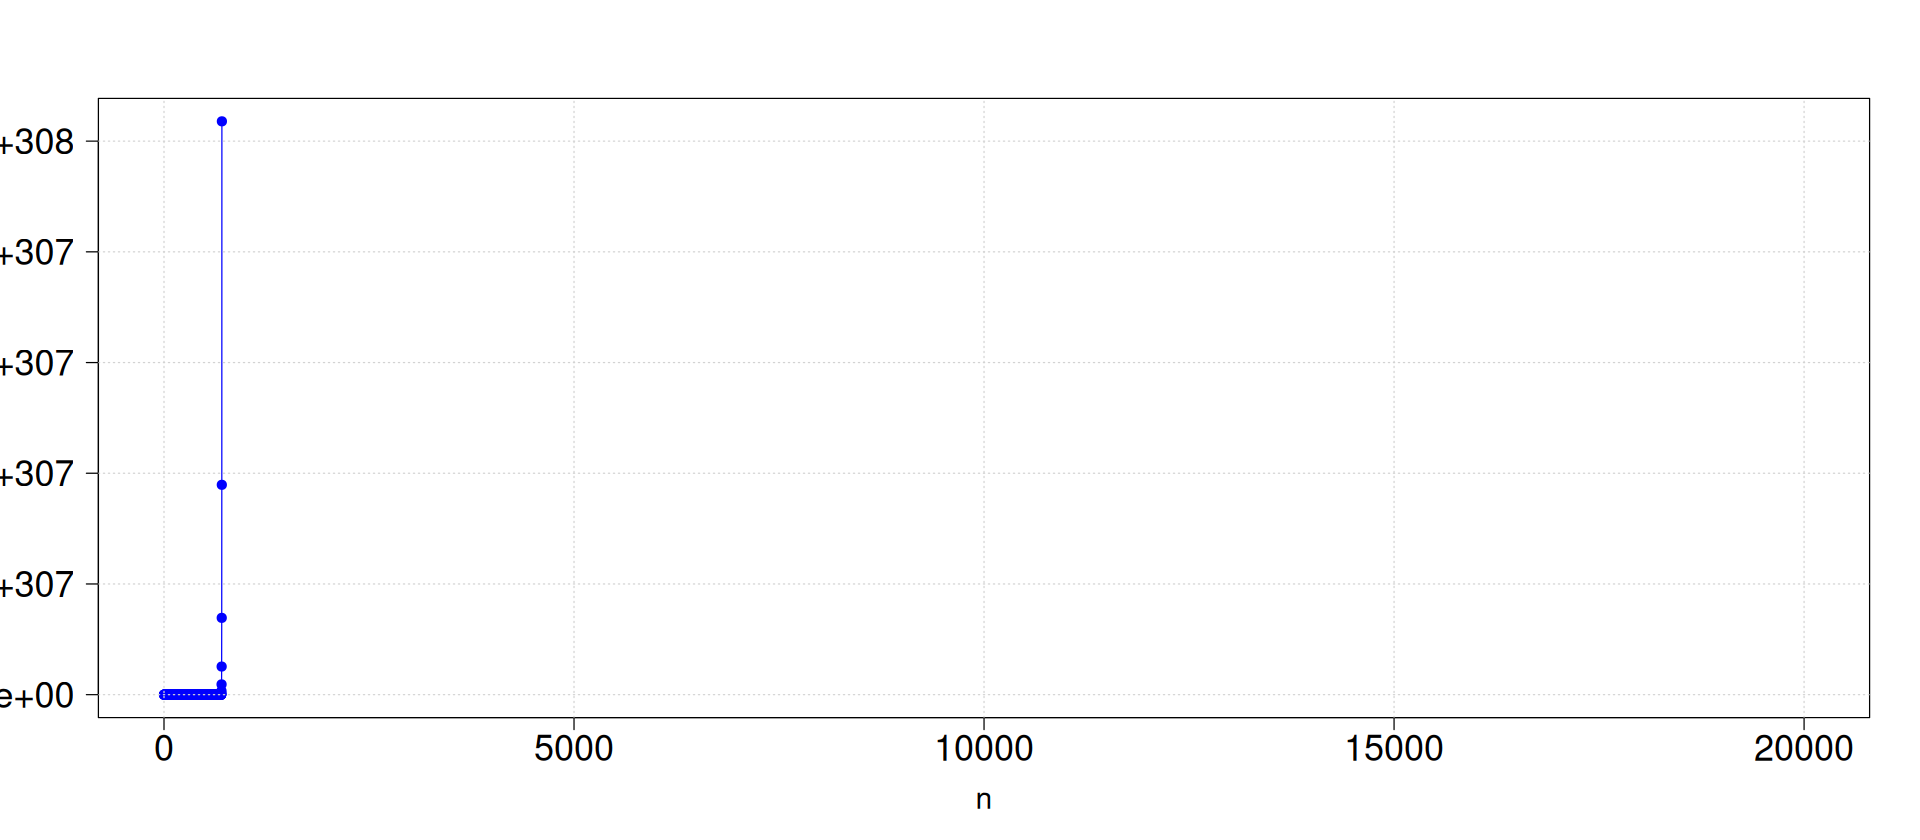

In [18]:
N=20000;t<-0:(N-1);a1=2.;a2=2.;Z<-rnorm(N,mean=0,sd=1) # No causal solution
X<-c(1,N);X[1]=1;X[2]=2;for (k in 3:N){X[k]=Z[k]+a1*X[k-1]+a2*X[k-2];}; # dev.new(width=12,height=8)
plot(t,X,pch=19,ylab='',xlab='n',col="blue",cex.axis=1.8, cex.lab=1.5,las=1); lines(t,X, col= "blue"); grid()

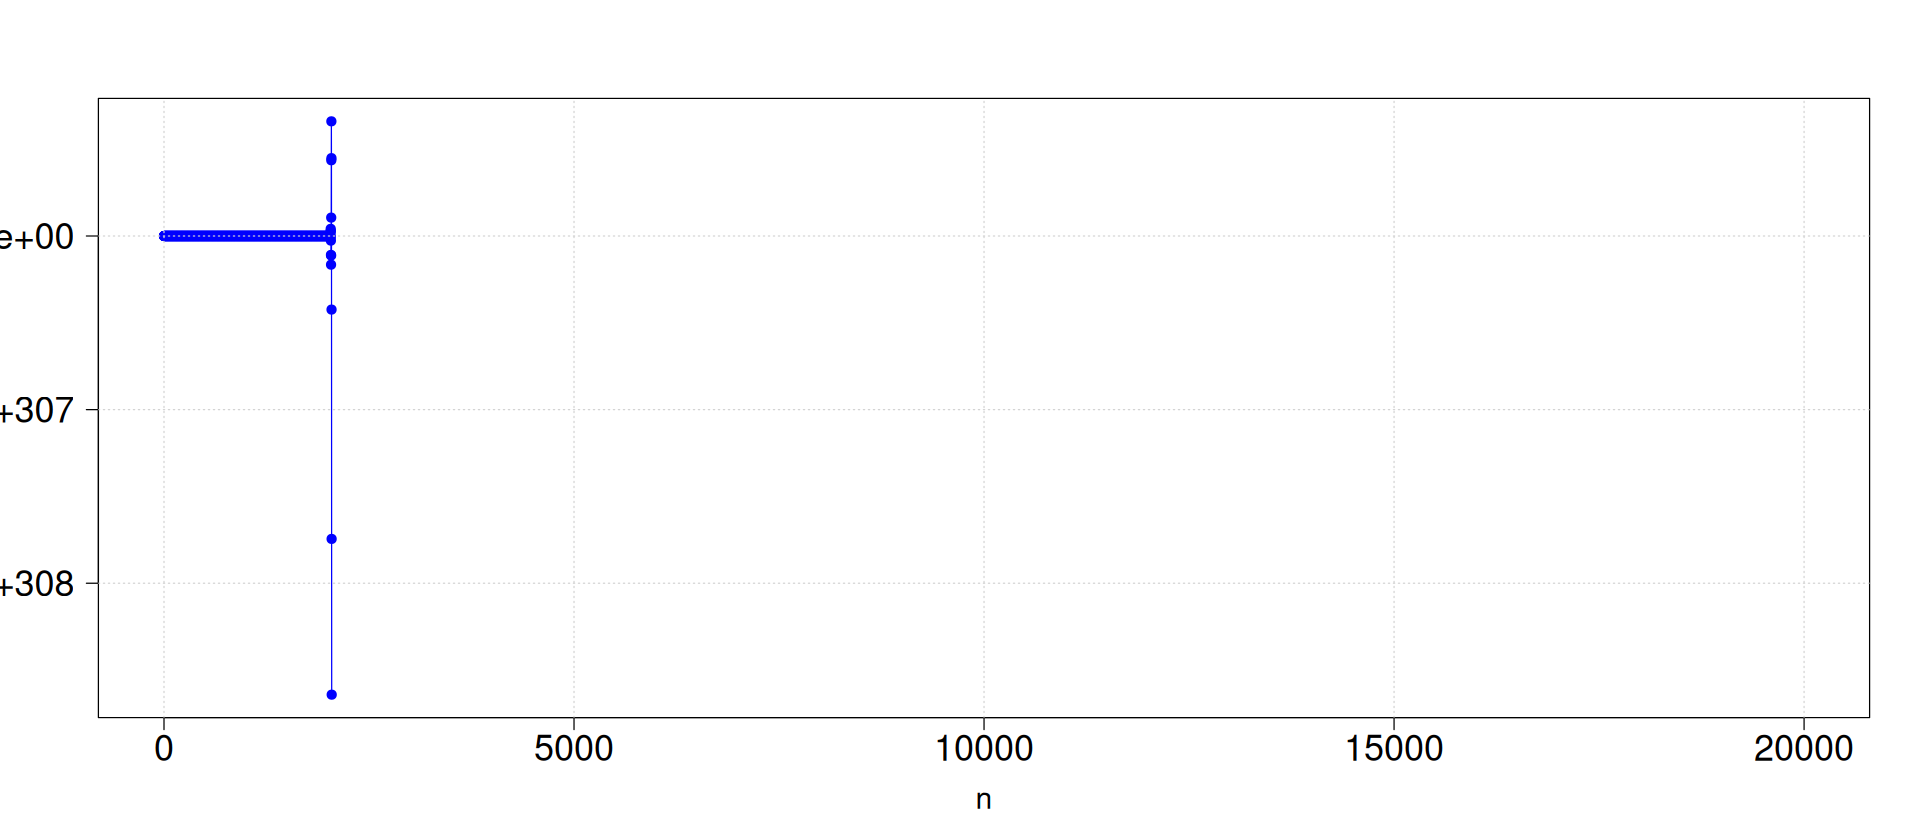

In [19]:
N=20000; t<- 0:(N-1); a1=2.0;a2=-2; # Weakly stationary, no causal solution
Z<- rnorm(N,mean=0,sd=1);X<- c(1,N); X[1]=1;X[2]=2;
for (k in 3:N){X[k]=Z[k]+a1*X[k-1]+a2*X[k-2];}; # dev.new(width=12,height=8)
plot(t,X,pch=19, ylab='', xlab='n', col= "blue",cex.axis=1.8, cex.lab=1.5,las=1)
lines(t,X, col= "blue"); grid()

In [20]:
# install.packages('tseries'); 
library('tseries'); adf.test(ar.sim); adf.test(arima.s)

Warning message in adf.test(ar.sim):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ar.sim
Dickey-Fuller = -25.236, Lag order = 27, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  arima.s
Dickey-Fuller = -1.8353, Lag order = 3, p-value = 0.6388
alternative hypothesis: stationary


In [21]:
arima(data,order=c(p,d,q))

ERROR: Error in attr(data, "tsp") <- c(start, end, frequency): object is not a matrix


Loading required package: xts

Loading required package: TTR


Attaching package: ‘TTR’


The following object is masked from ‘package:fGarch’:

    volatility




[1] "1800.HK"

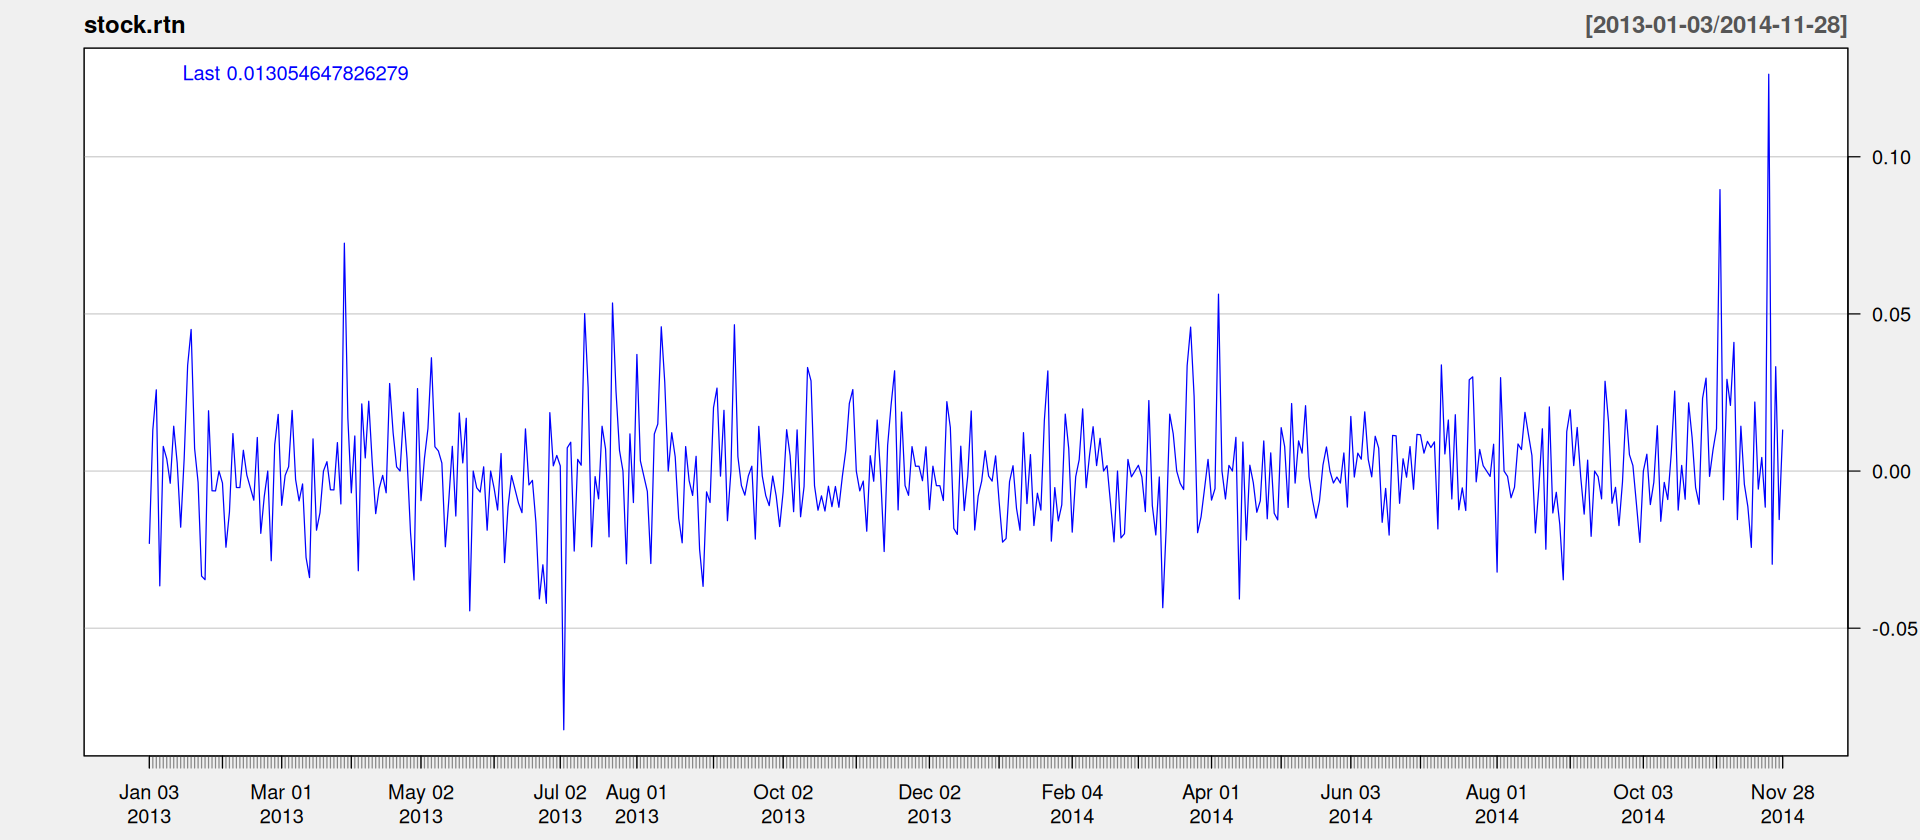

In [22]:
library(quantmod); getSymbols("1800.HK",from="2013-01-01",to="2014-11-30",src="yahoo")
stock=Ad(`1800.HK`); stock=stock[!is.na(stock)];
stock.rtn=(stock-lag(stock))/lag(stock)[-1]; # dev.new(width=12,height=6)
stock.rtn=stock.rtn[!is.na(stock.rtn)];chartSeries(stock.rtn,up.col="blue",theme="white")

Series: stock.rtn 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0003368:  log likelihood = 1212.16
AIC=-2422.32   AICc=-2422.32   BIC=-2418.17

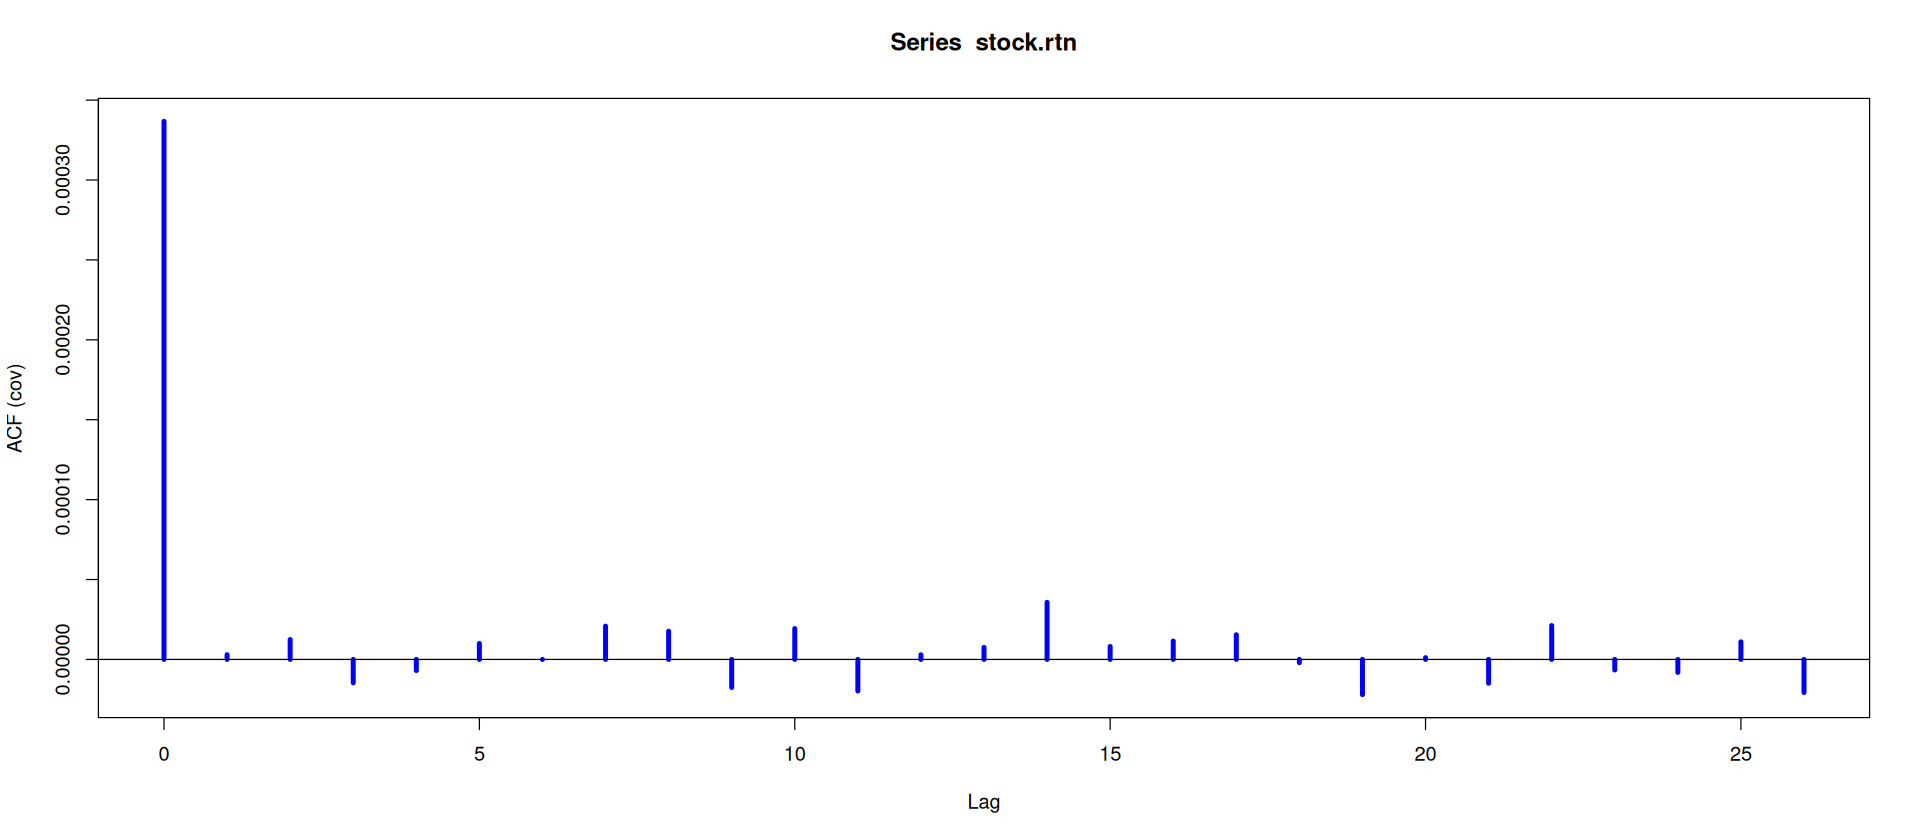

In [23]:
library(forecast)
auto.arima(stock.rtn);acf(stock.rtn,type="covariance",plot=T,col='blue',lwd=4);

In [24]:
arima(stock.rtn,order=c(0,0,3))


Call:
arima(x = stock.rtn, order = c(0, 0, 3))

Coefficients:
         ma1     ma2      ma3  intercept
      0.0087  0.0417  -0.0469      3e-04
s.e.  0.0461  0.0466   0.0470      8e-04

sigma^2 estimated as 0.0003355:  log likelihood = 1213.1,  aic = -2416.19

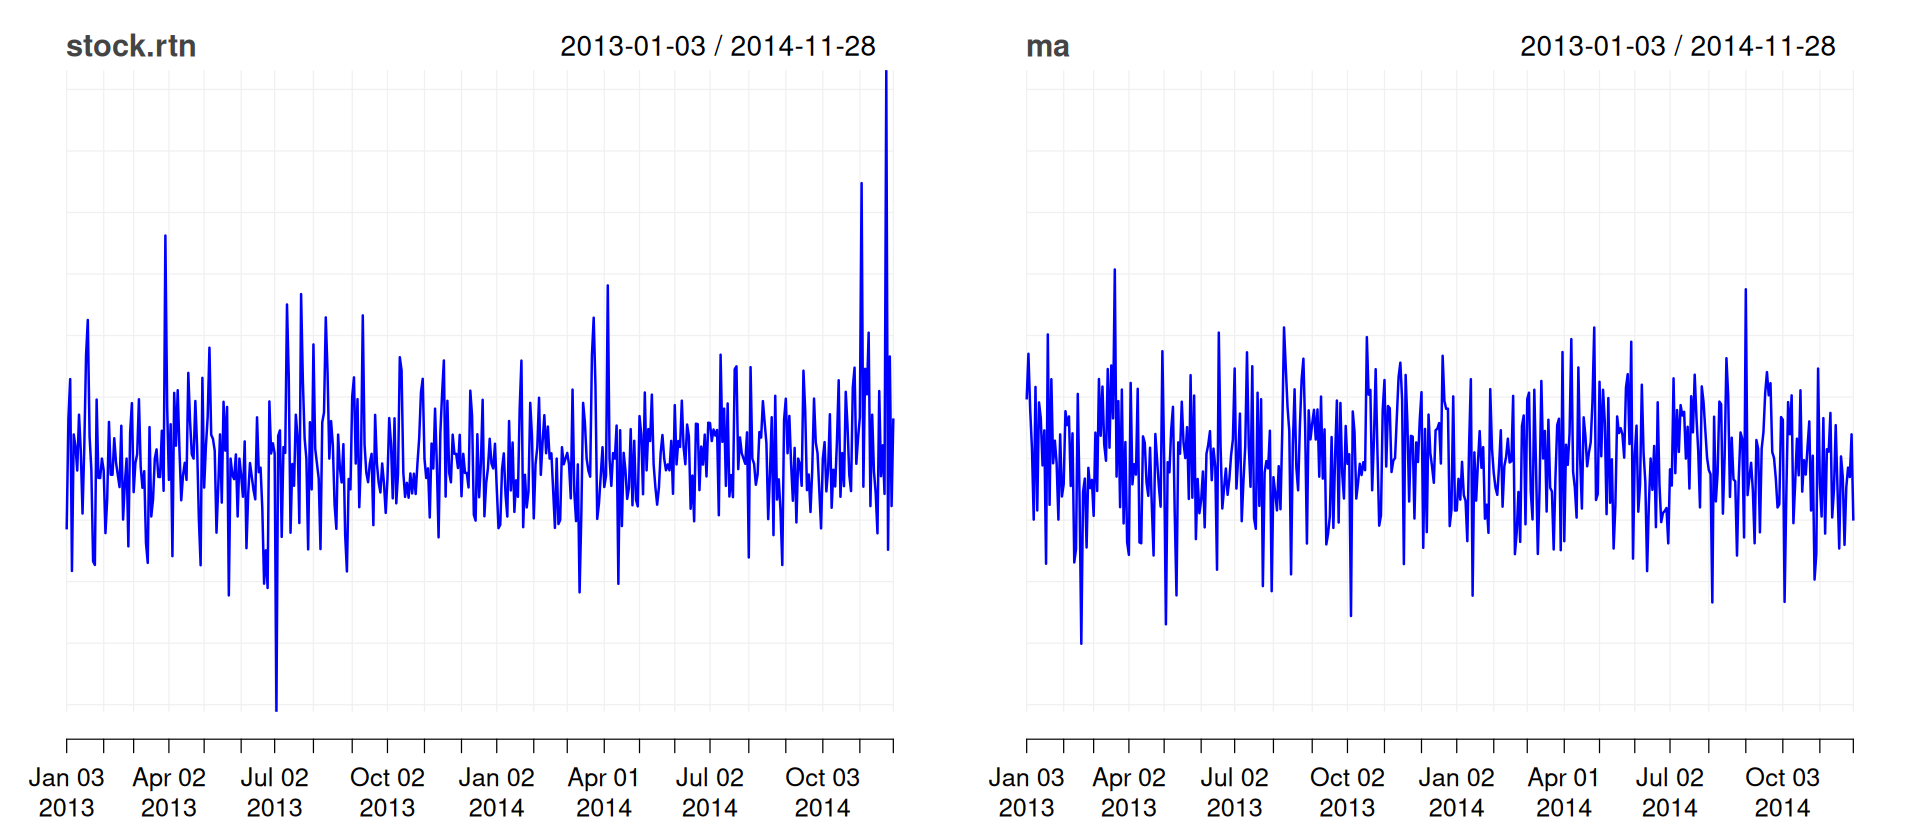

In [25]:
n=length(stock.rtn); x=seq(100,100+n-1); myPars=chart_pars();myPars$cex=1.4;
arima.s=arima.sim(model=list(ma=c(.0029,.0470,-.0416),order=c(0,0,3)),n.st=100,n)
dates=index(stock.rtn);ma=xts(x=arima.s, order.by= dates)*sd(stock.rtn);
myTh=chart_theme();myTh$col$line.col="blue";myTh$rylab=F; # dev.new(width=12,height=8)
par(mfrow=c(1,2));chart_Series(stock.rtn,theme=myTh,pars=myPars)
graph<-chart_Series(ma,theme=myTh,pars=myPars);myylim<-graph$get_ylim()
myylim[[2]]<-structure(c(min(stock.rtn),max(stock.rtn)),fixed=T);graph$set_ylim(myylim);graph

In [26]:
arima(stock.rtn,order=c(2,0,2))


Call:
arima(x = stock.rtn, order = c(2, 0, 2))

Coefficients:
          ar1      ar2     ma1     ma2  intercept
      -0.7643  -0.9396  0.8039  0.9783      3e-04
s.e.   0.0350   0.0389  0.0228  0.0297      9e-04

sigma^2 estimated as 0.0003318:  log likelihood = 1215.34,  aic = -2418.68

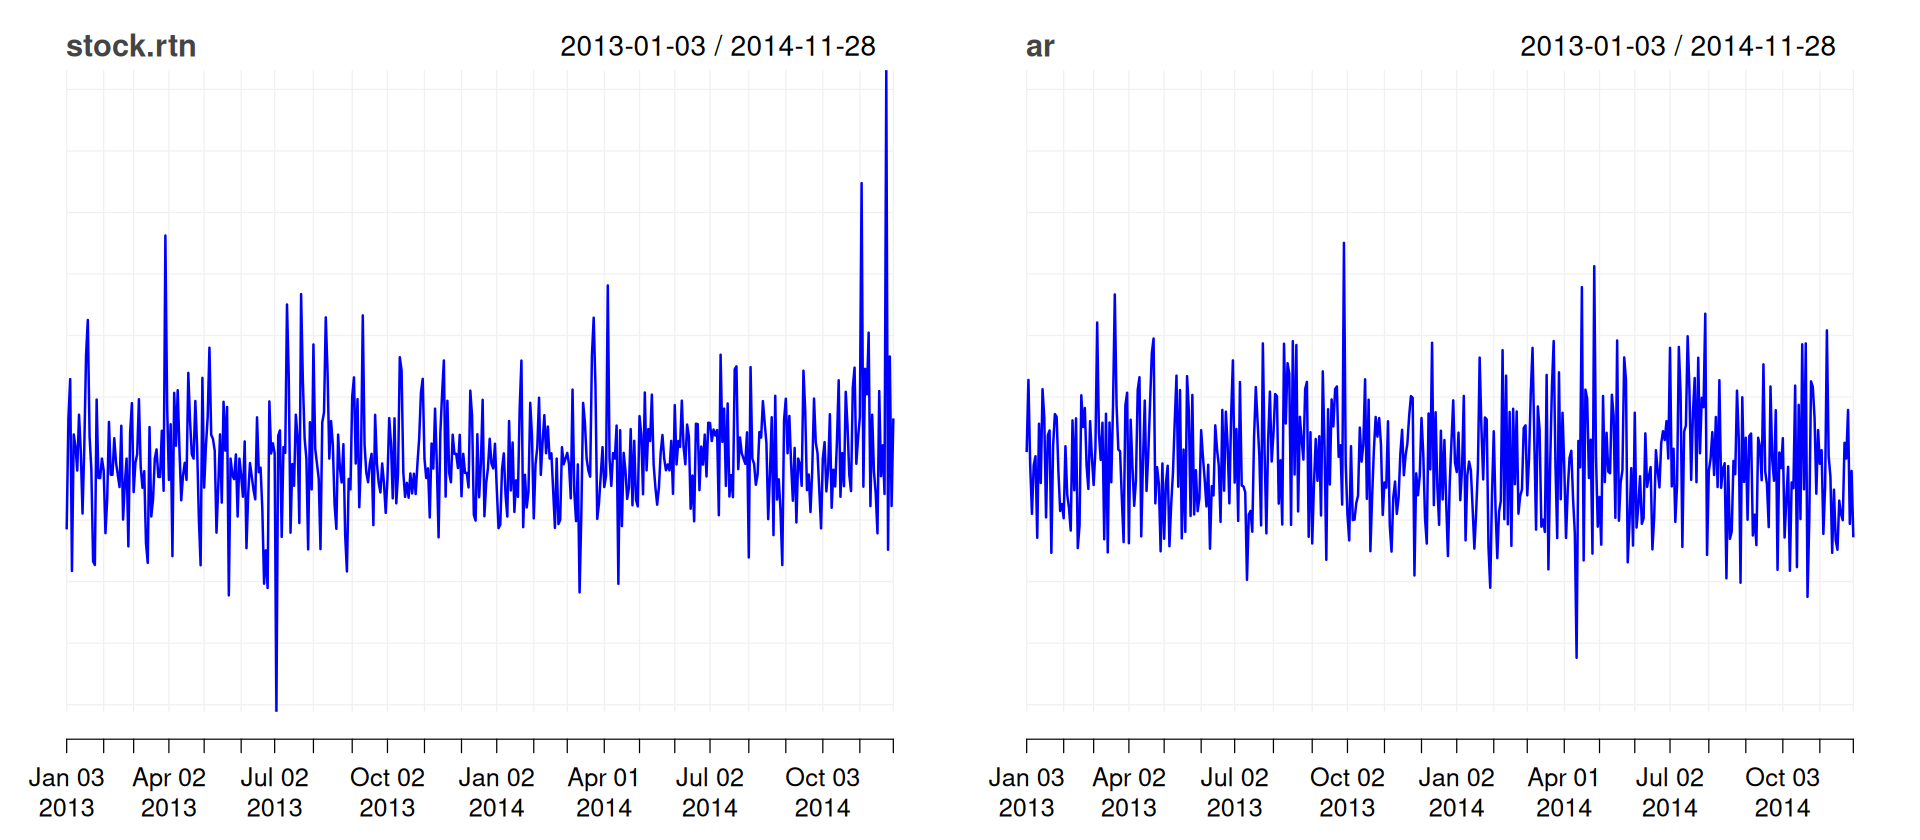

In [27]:
n=length(stock.rtn); x=seq(100,100+n-1); dates=index(stock.rtn);myPars=chart_pars();
arima.s=arima.sim(model=list(ar=c(-1.0593,-.9048),ma=c(1.05,.95),order=c(2,0,2)), n.st=100,n)
ar=xts(x=arima.s, order.by= dates)*sd(stock.rtn);myPars$cex=1.4; myTh=chart_theme();
myTh$col$line.col="blue";myTh$rylab=F; # dev.new(width=12,height=8); 
par(mfrow=c(1,2)); chart_Series(stock.rtn,theme=myTh,pars=myPars)
graph=chart_Series(ar,theme=myTh,pars=myPars); myylim=graph$get_ylim()
myylim[[2]]=structure(c(min(stock.rtn),max(stock.rtn)),fixed=T);graph$set_ylim(myylim);graph

In [28]:
library(fGarch); garchFit(~ garch(1,1), data= stock.rtn, trace= FALSE)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = stock.rtn, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x5a567fc84688>
 [data = stock.rtn]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
1.0464e-04  8.6641e-06  4.6635e-02  9.3253e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     1.046e-04   8.060e-04    0.130   0.8967    
omega  8.664e-06   4.954e-06    1.749   0.0803 .  
alpha1 4.664e-02   1.744e-02    2.674   0.0075 ** 
beta1  9.325e-01   2.121e-02   43.966   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 1221.108    normalized:  2.598101 

Description:
 Sun Jan  4 11:21:37 2026 by user: nprivault 


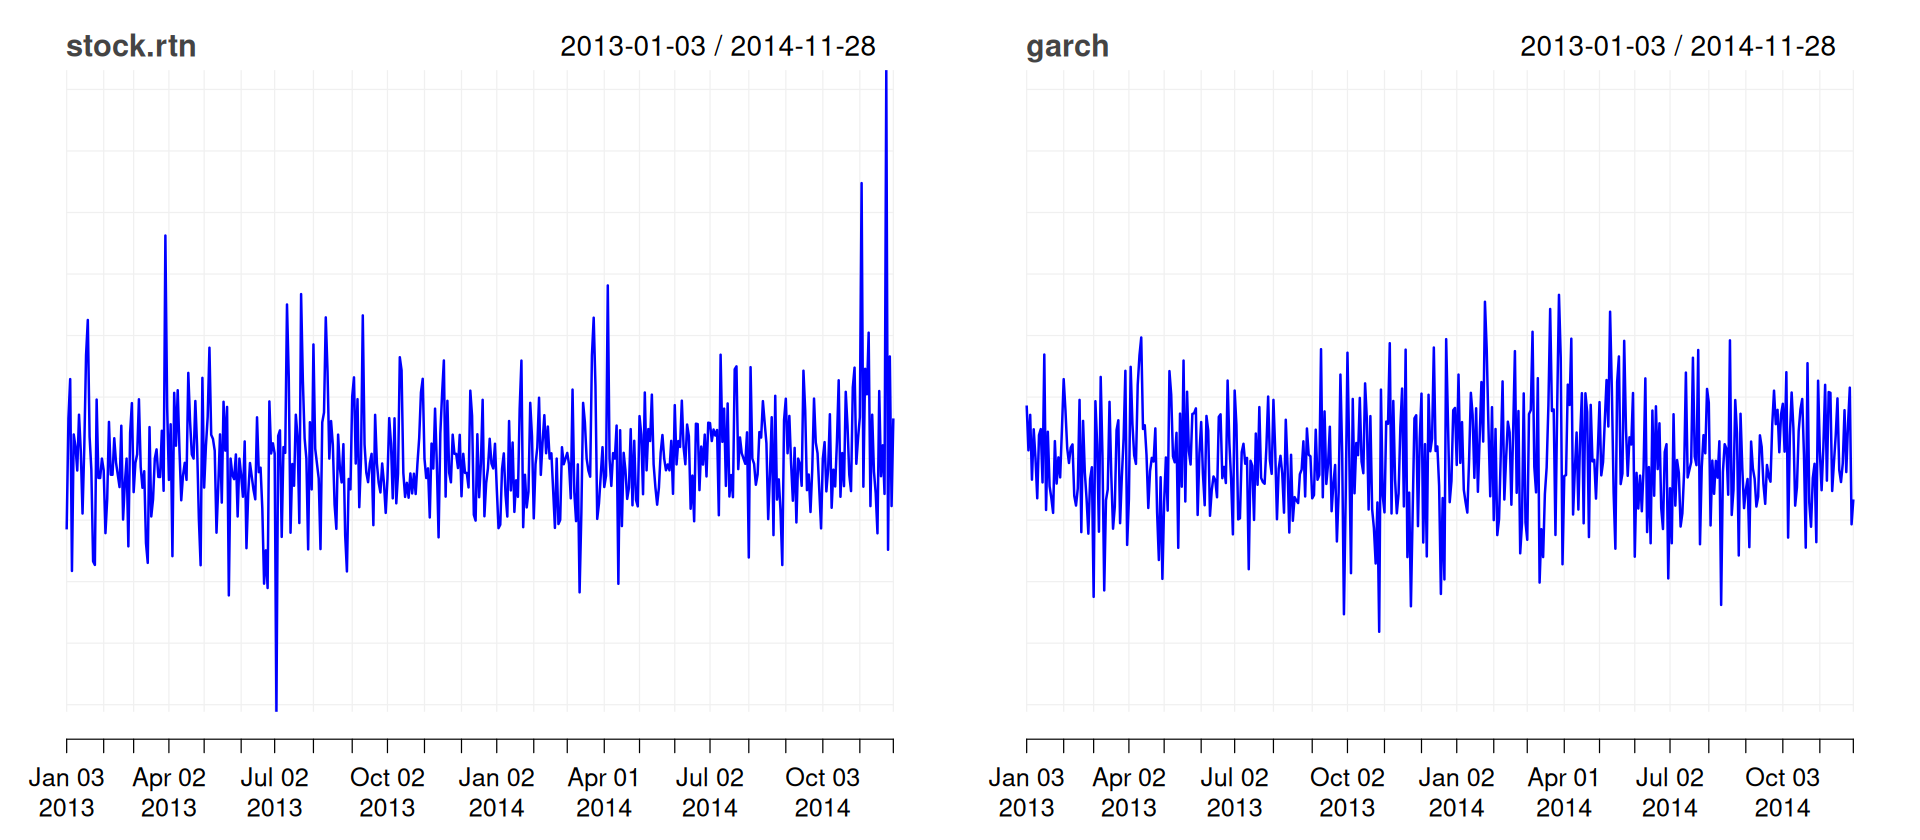

In [30]:
n=length(stock.rtn); myPars<- chart_pars(); myPars$cex<-1.4;myTh<- chart_theme();
garch.sp<-garchSpec(model=list(alpha0= 9.124e-06, alpha=c(4.522e-02),beta= c(9.308e-01)))
garch.sim<-garchSim(garch.sp,n); x=seq(100,100+n-1); dates<- index(stock.rtn)
garch<-xts(x=garch.sim, order.by= dates)*sd(stock.rtn)/sd(garch.sim);
myTh$col$line.col<- "blue"; myTh$rylab<- FALSE; # dev.new(width=12,height=8)
par(mfrow=c(1,2));chart_Series(stock.rtn,theme=myTh,pars=myPars)
graph<-chart_Series(garch,theme=myTh,pars=myPars); myylim<- graph$get_ylim()
myylim[[2]]<-structure(c(min(stock.rtn),max(stock.rtn)),fixed=T);graph$set_ylim(myylim);graph

[1] "1800.HK"


Call:
arima(x = stock, order = c(2, 1, 2))

Coefficients:
          ar1      ar2     ma1     ma2
      -0.3109  -0.9592  0.3490  0.9759
s.e.   0.0139   0.0178  0.0106  0.0140

sigma^2 estimated as 0.03273:  log likelihood = 353.21,  aic = -696.42

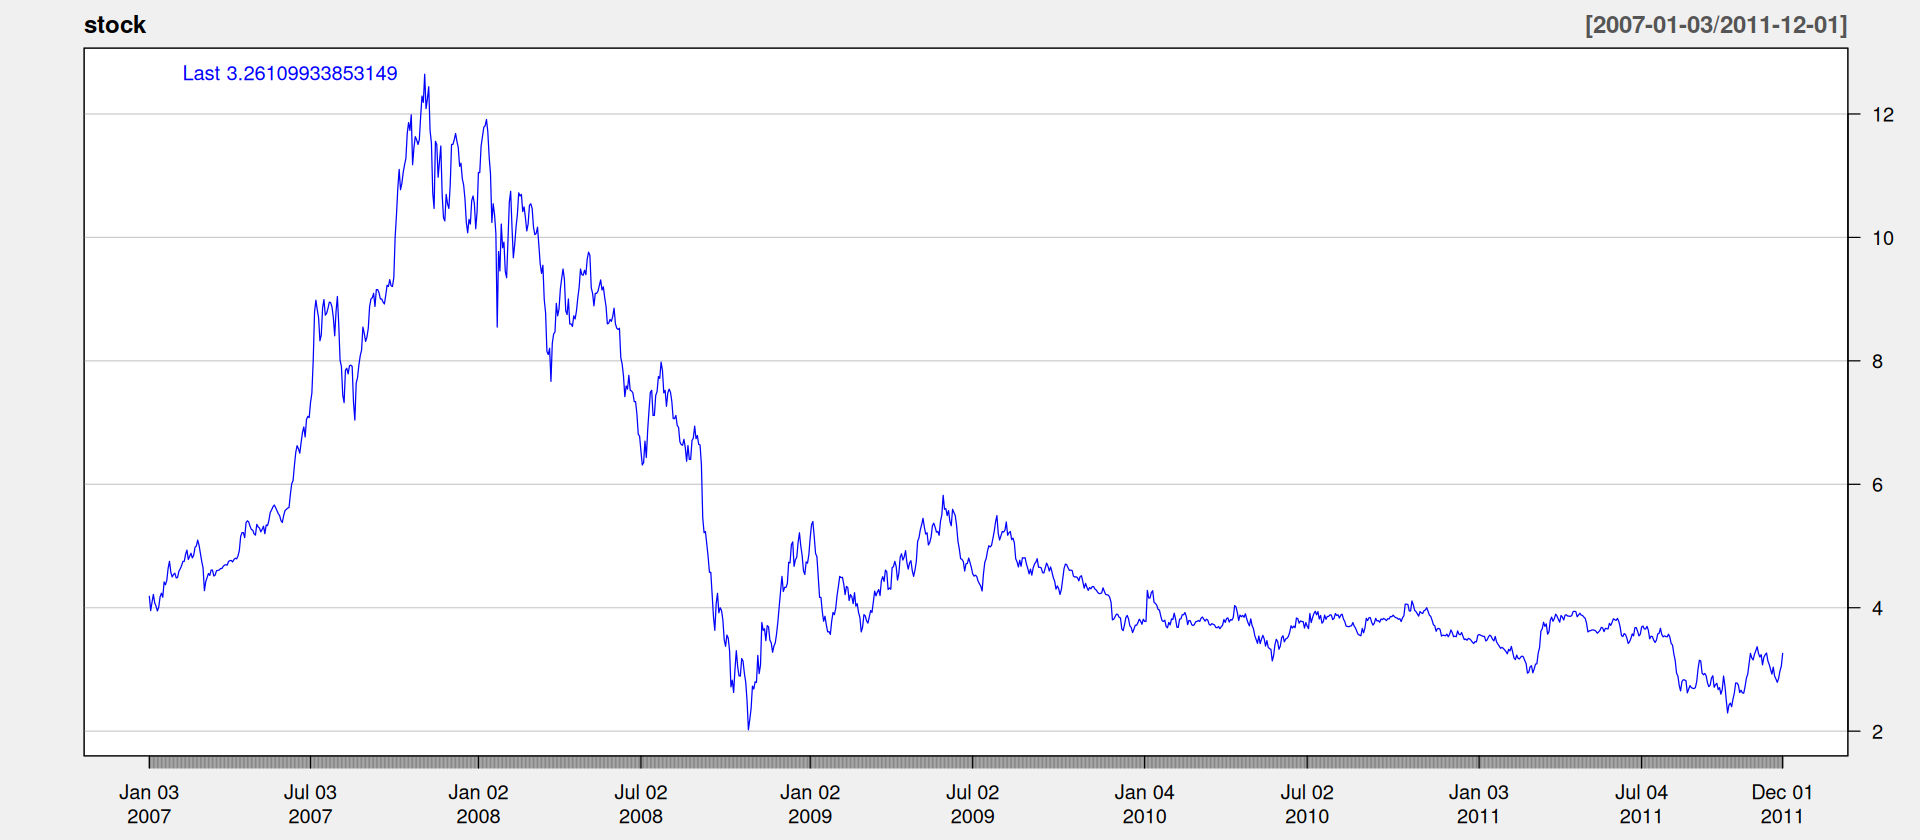

In [31]:
library(quantmod); getSymbols("1800.HK",from="2007-01-03",to="2011-12-02",src="yahoo")
stock=Ad(`1800.HK`); chartSeries(stock,up.col="blue",theme="white")
n= length(stock); arima(stock,order=c(2,1,2))

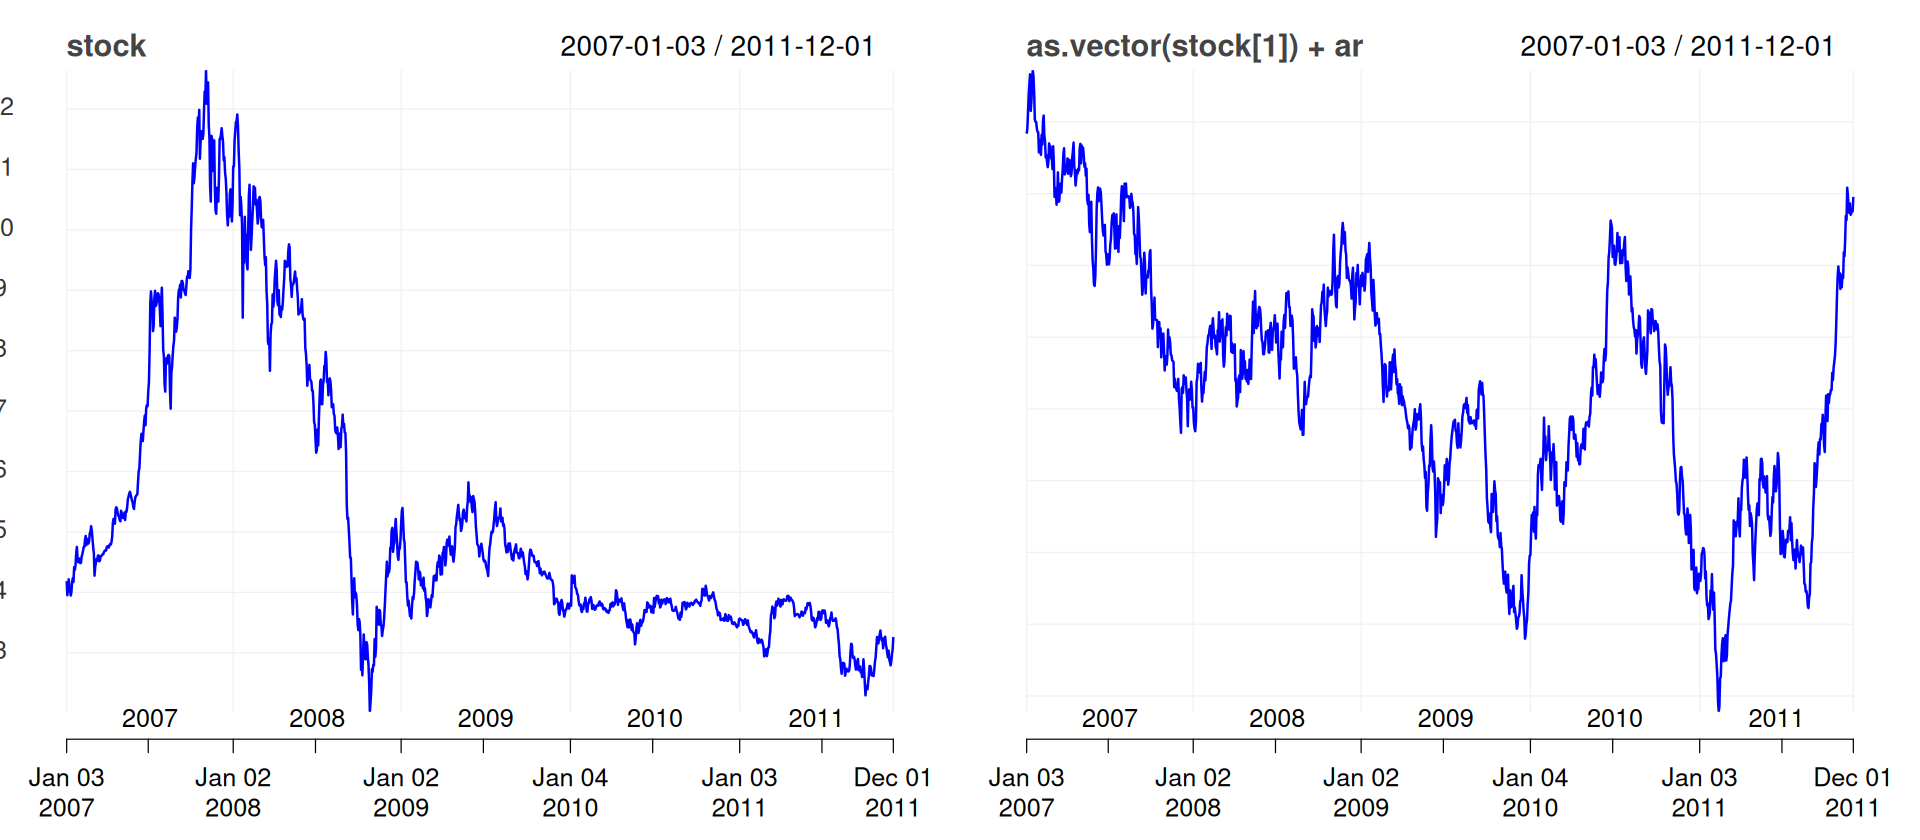

In [33]:
n=length(stock)-1;myPars=chart_pars();myPars$cex=1.4;x=seq(100,100+n);dates=index(stock)
arima.s=arima.sim(model=list(ar=c(-.31,-.94),ma=c(.35,.96),order=c(2,1,2)), n.st=100,n)
ar=xts(x=arima.s,order.by=dates);myTh=chart_theme();myTh$col$line.col="blue"; myTh$rylab=F; # dev.new(width=12,height=8);
par(mfrow=c(1,2)); chart_Series(stock,theme=myTh,pars=myPars)
chart_Series(as.vector(stock[1])+ar,theme=myTh,pars=myPars)

[1] "1800.HK" "MSFT"    "AAPL"

[1] "1800.HK" "MSFT"    "AAPL"

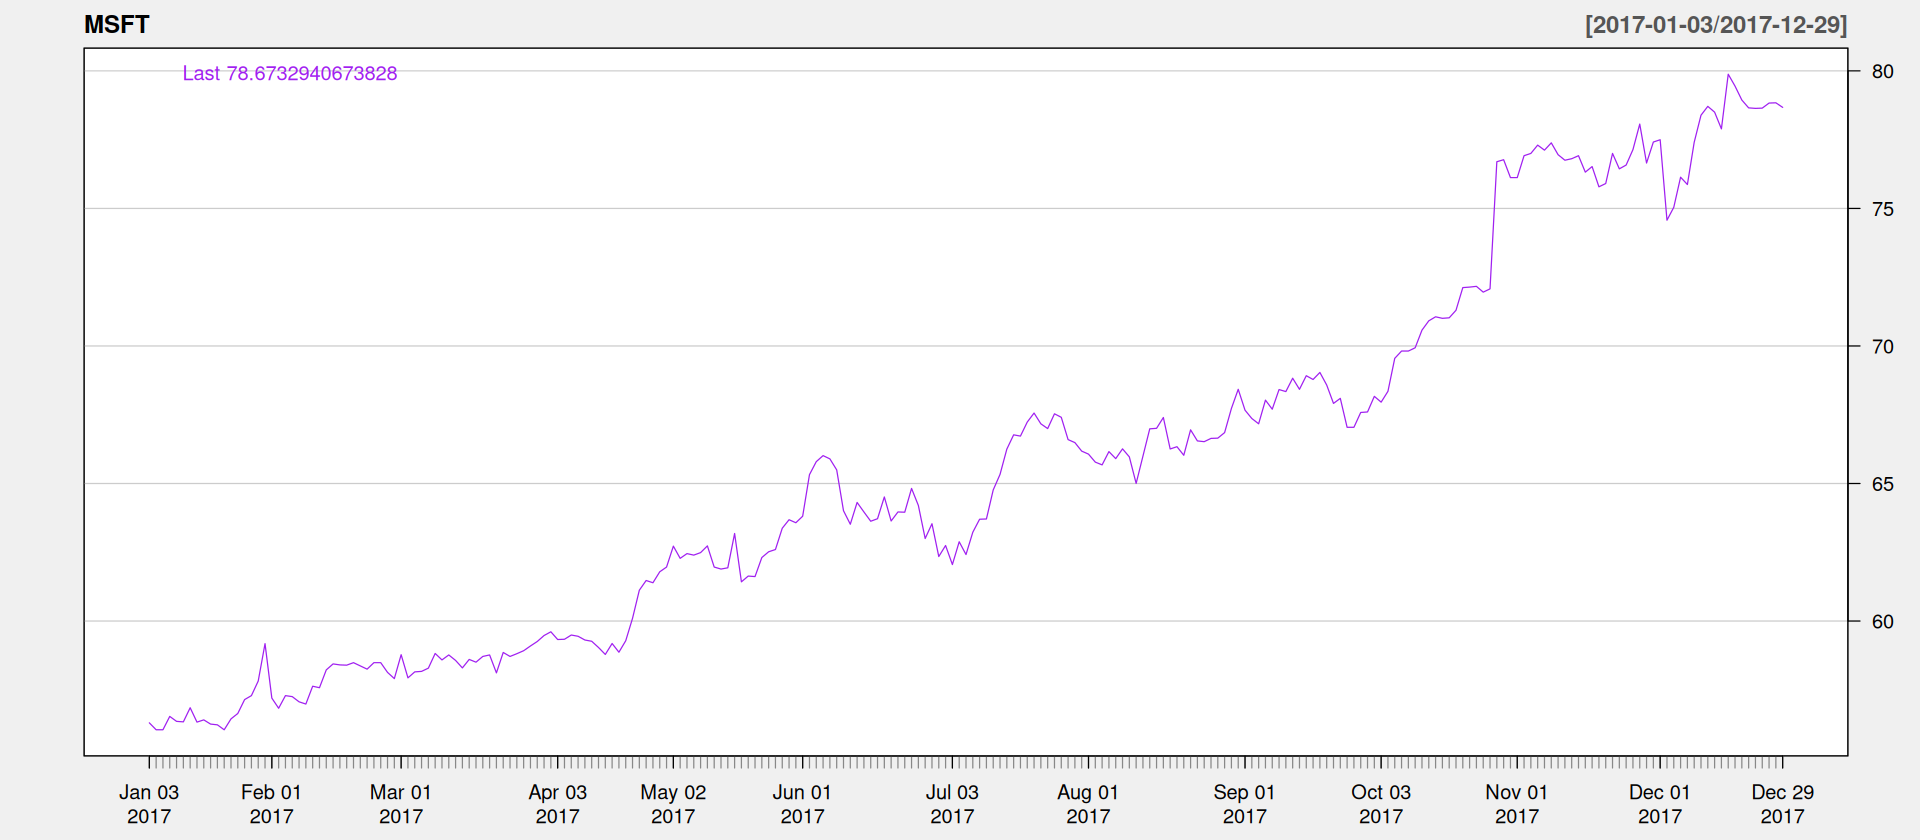

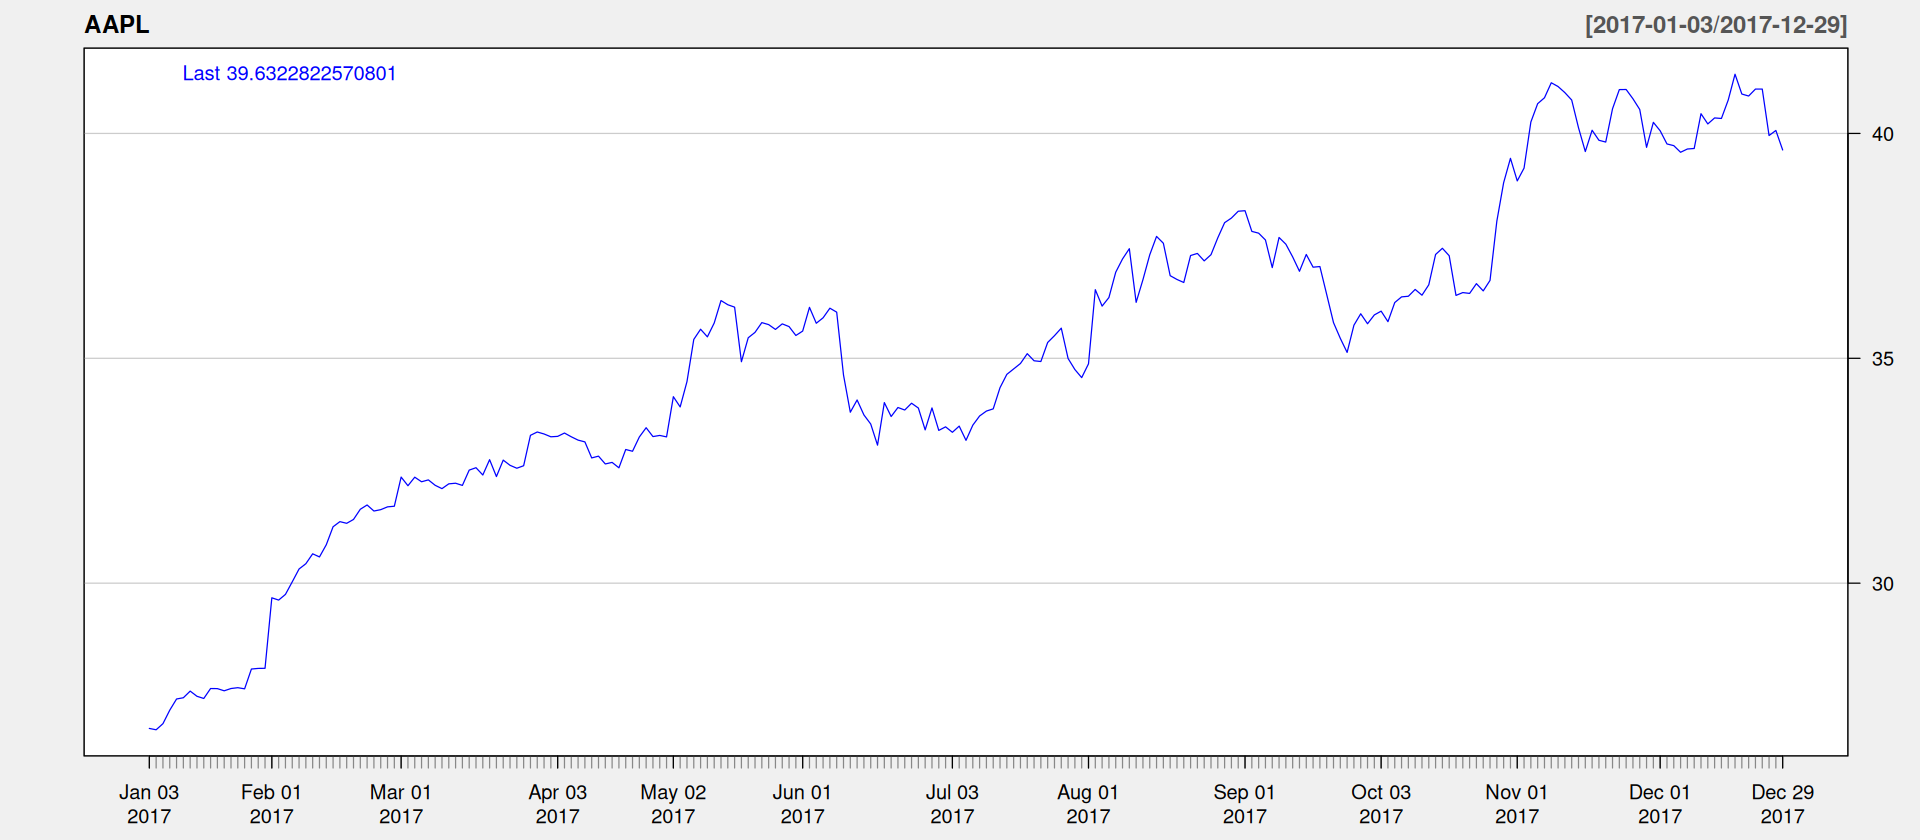

In [34]:
# install.packages("quantmod"); 
library(quantmod); symb= c("1800.HK","KO","PEP"); symb= c("1800.HK","MSFT","AAPL")
getSymbols(symb,from=Sys.Date()-365,to=Sys.Date())
ClP=lapply(symb, function(x) Ad(get(x)))
getSymbols(symb,from="2017-01-01",to="2018-01-01")
ClP=lapply(symb, function(x) Ad(get(x)))
stock=do.call(merge, ClP);stock.price=stock[rowSums(is.na(stock[ , 1:3])) == 0, ];
chartSeries(stock.price[,2],up.col="purple",theme="white",name= symb[2])
chartSeries(stock.price[,3],up.col="blue",theme="white",name= symb[3])

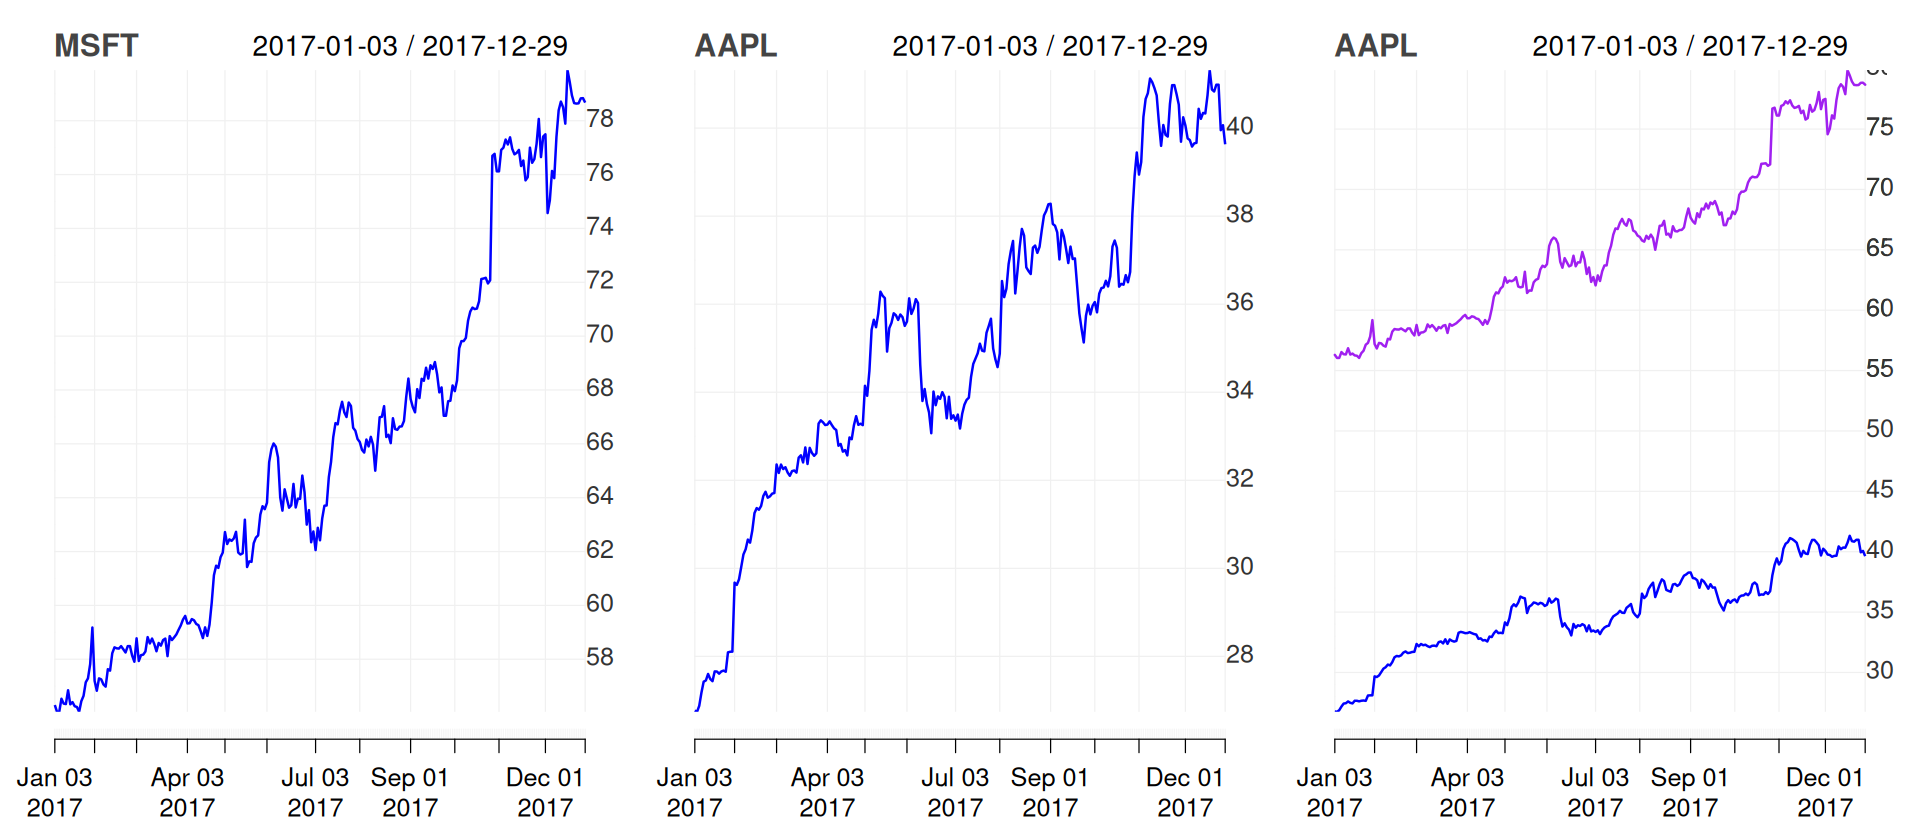

In [35]:
myPars=chart_pars();myPars$cex=1.4;myTh=chart_theme();myTh$col$line.col="blue"; # dev.new(width=12,height=8)
par(mfrow=c(1,3)); chart_Series(stock.price[,2],up.col="purple",theme=myTh,name= symb[2],pars=myPars)
chart_Series(stock.price[,3],up.col="blue",theme=myTh,name= symb[3],pars=myPars)
add_TA(stock.price[,2], col='purple', lw=2, on= 1)

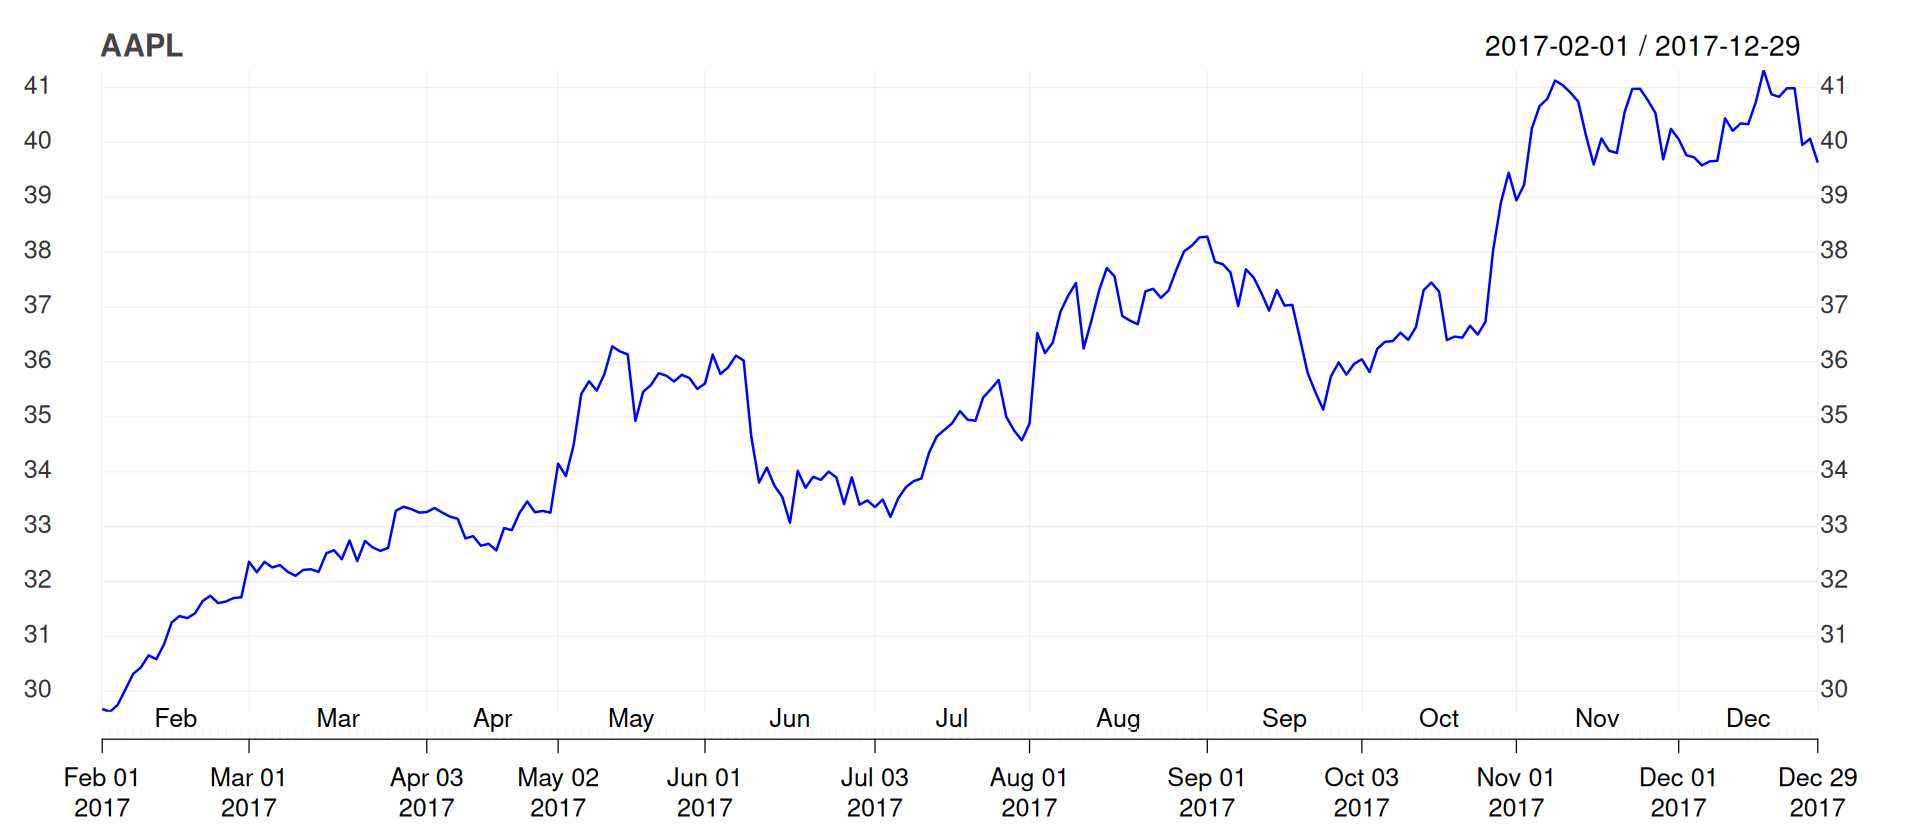

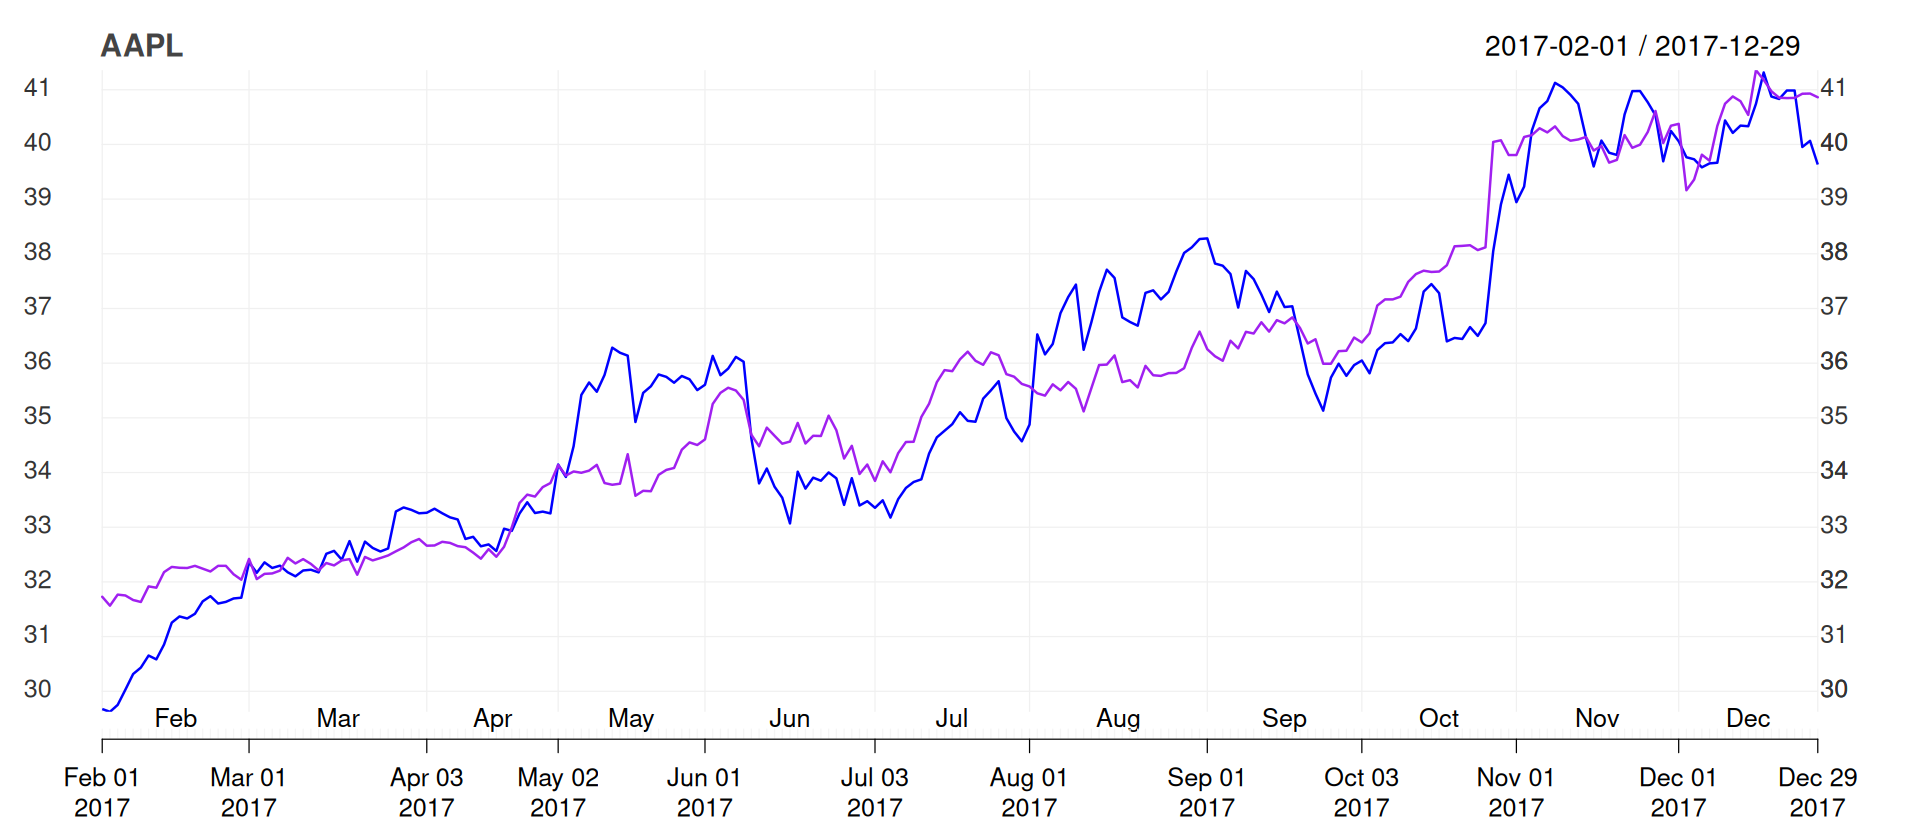

In [36]:
price.pair=stock.price[,2:3]["2017-02-01::"]; reg=lm(log(price.pair[,2]) ~ log(price.pair[,1]))
b=as.numeric(reg$coef[2]);a=as.numeric(reg$coef[1]);myPars=chart_pars();myPars$cex=1.4
myTh=chart_theme();myTh$col$line.col="blue"; # dev.new(width=12,height=8)
chart_Series(price.pair[,2],theme=myTh,pars=myPars, name= symb[3])
add_TA(exp(a+b*log(price.pair[,1])), col='purple', lw=2, on= 1)

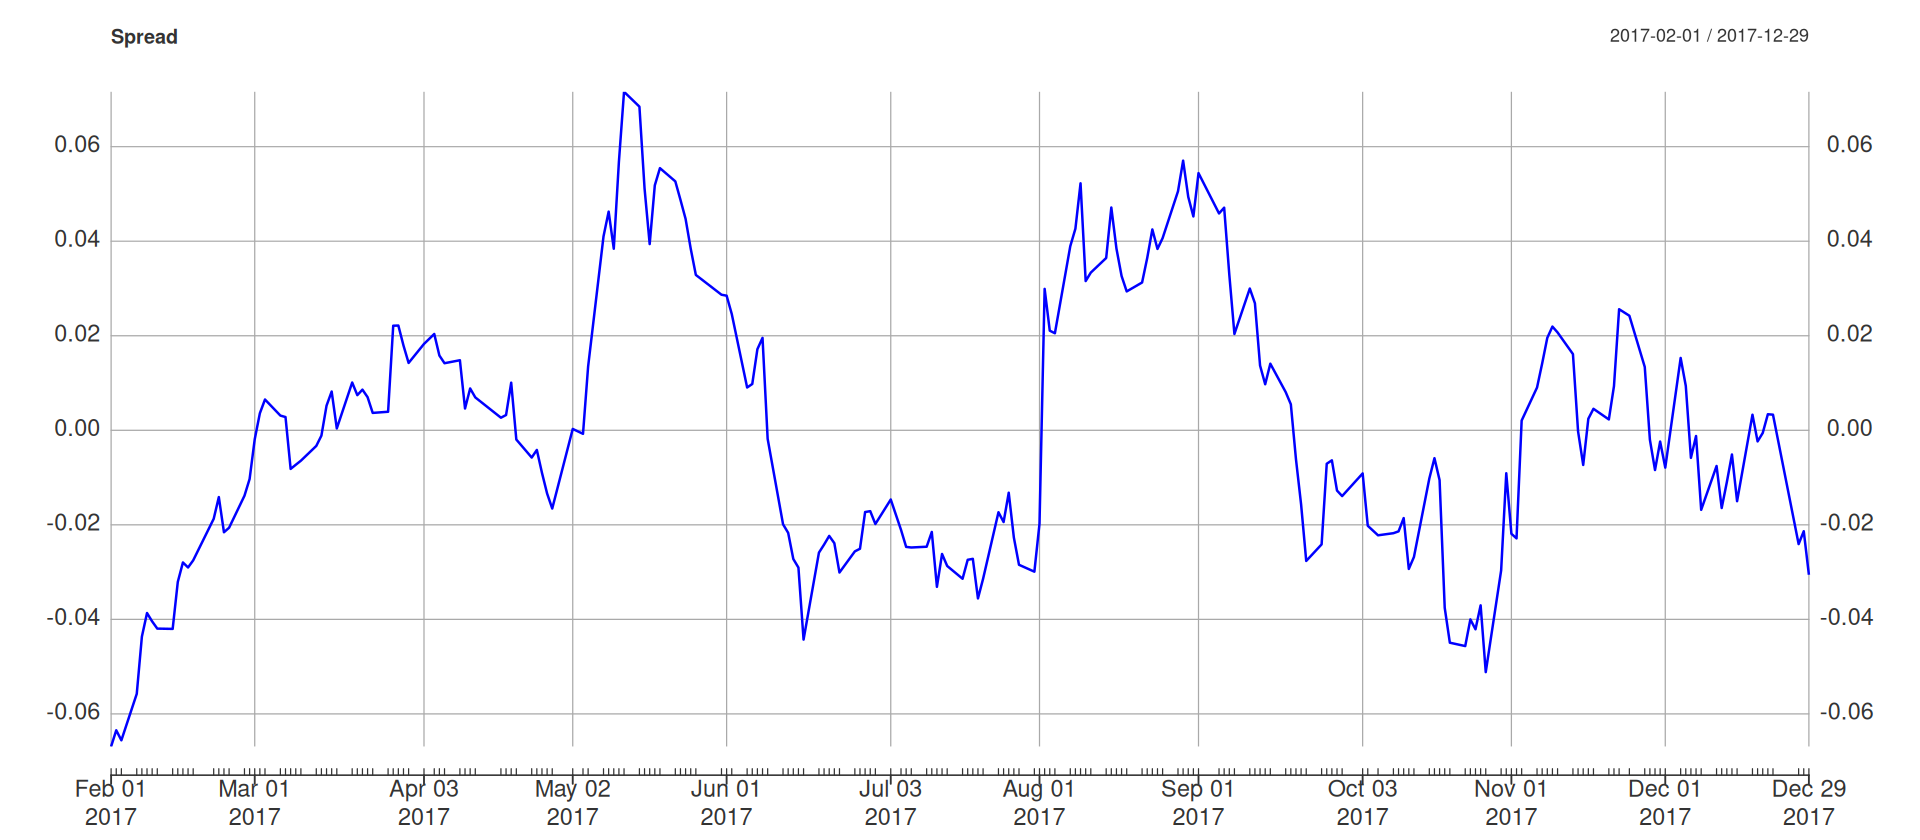

In [38]:
spread<- log(price.pair[,2]) - ( a+ b * log(price.pair[,1])); # dev.new(width=12,height=7); 
plot(spread,col='blue', main= "Spread",cex.axis=1.3)

In [39]:
# install.packages('tseries'); 
library('tseries'); adf.test(spread)


	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -2.8771, Lag order = 6, p-value = 0.2077
alternative hypothesis: stationary


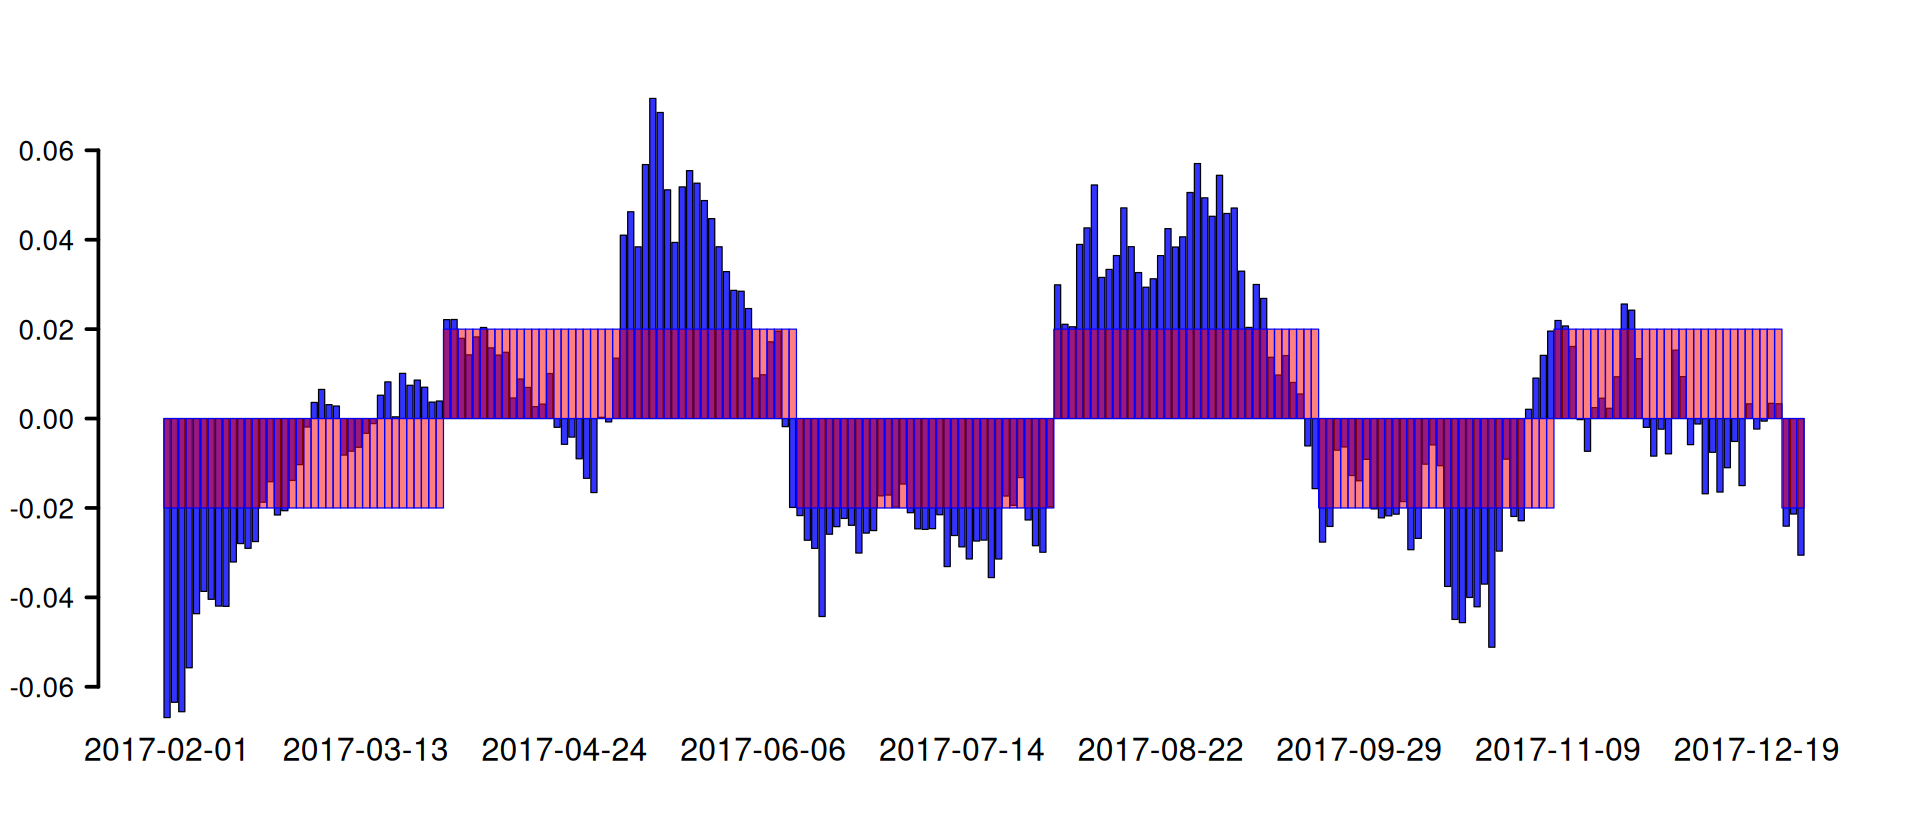

In [40]:
signal=spread;threshold=.02; signal[1]=
sign(as.numeric(spread[1]));i=1;threshold=-as.numeric(signal[1])*threshold
while (i<length(spread)){i=i+1; while (i<length(spread) &&
sign(as.numeric(spread[i+1])-threshold)==sign(as.numeric(spread[i])-threshold))
{signal[i]=sign(as.numeric(spread[i-1])-threshold);i=i+1;}
signal[i]=sign(as.numeric(spread[i-1])-threshold);threshold=-threshold;}
signal[i]=sign(as.numeric(spread[i-1])-threshold);threshold=abs(threshold)
ratio1=range(spread)[1]/threshold;ratio2=range(spread)[2]/threshold
tblue<-rgb(0, 0, 1, alpha=.8);tred<-rgb(1, 0, 0, alpha=.5); # dev.new(width=12,height=7)
barplot(spread,col= tblue, lwd= 3, main='', cex.axis=1.4, cex=1.6, las=1); par(new=T);
barplot(-signal,offset=(range(spread)[1]+range(spread)[2])/threshold,ylim=c(ratio2,ratio1),
xpd=F,col=tred,space= 0,border="blue",xaxt='n',yaxt='n',xlab='',ylab='')

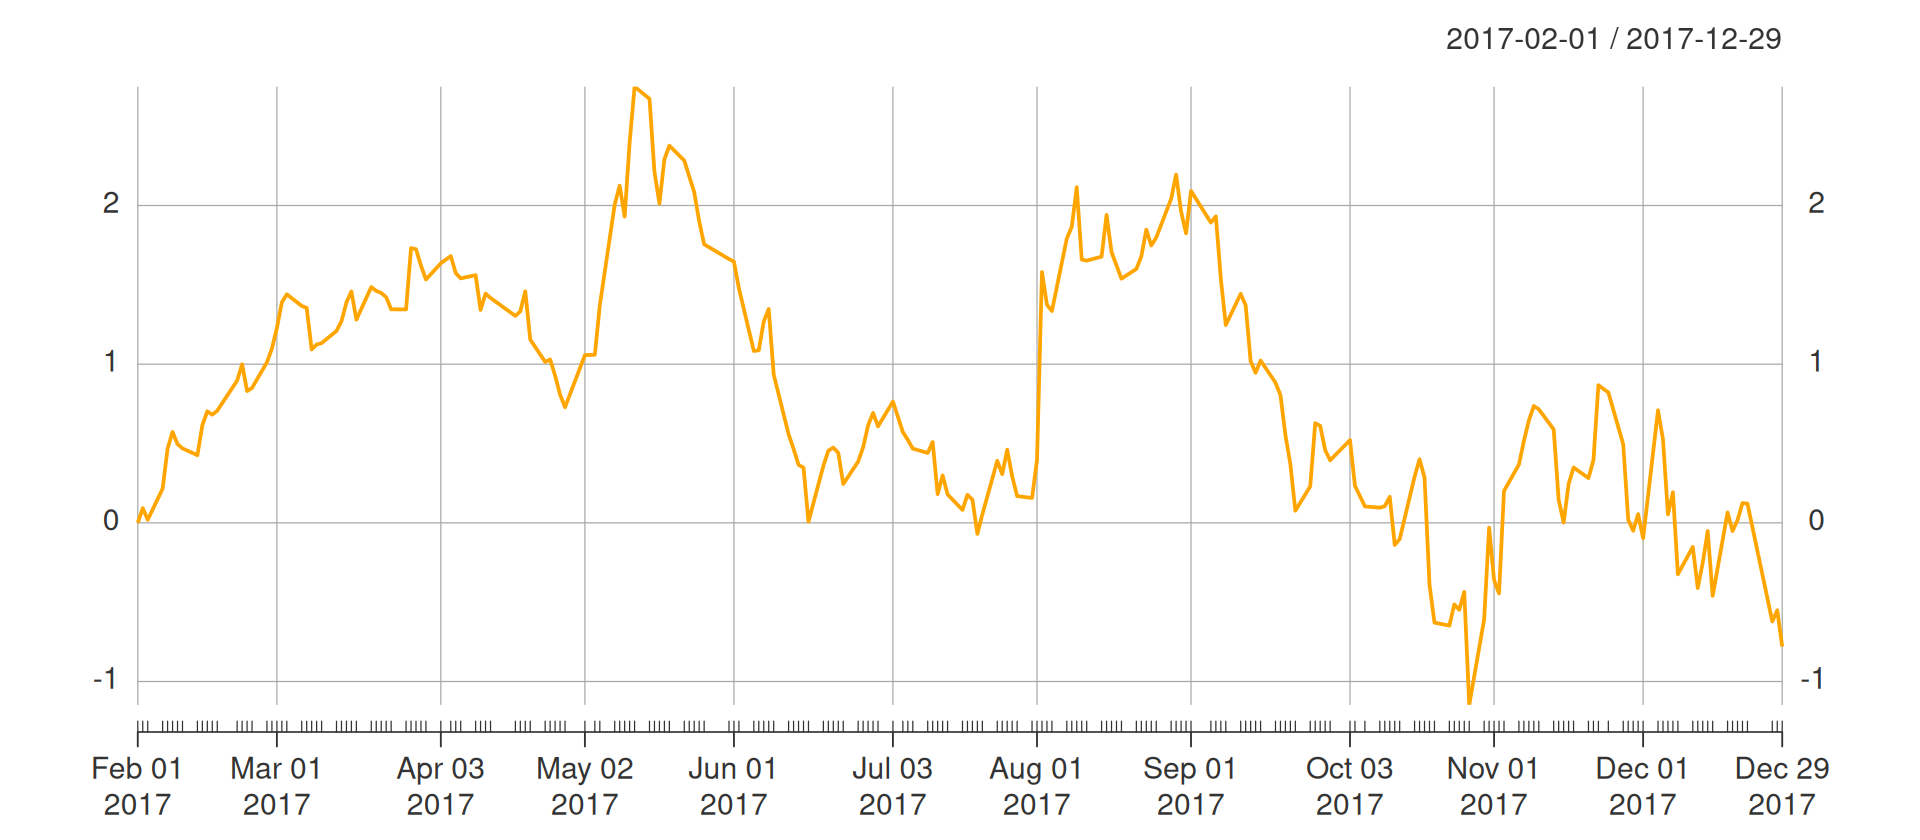

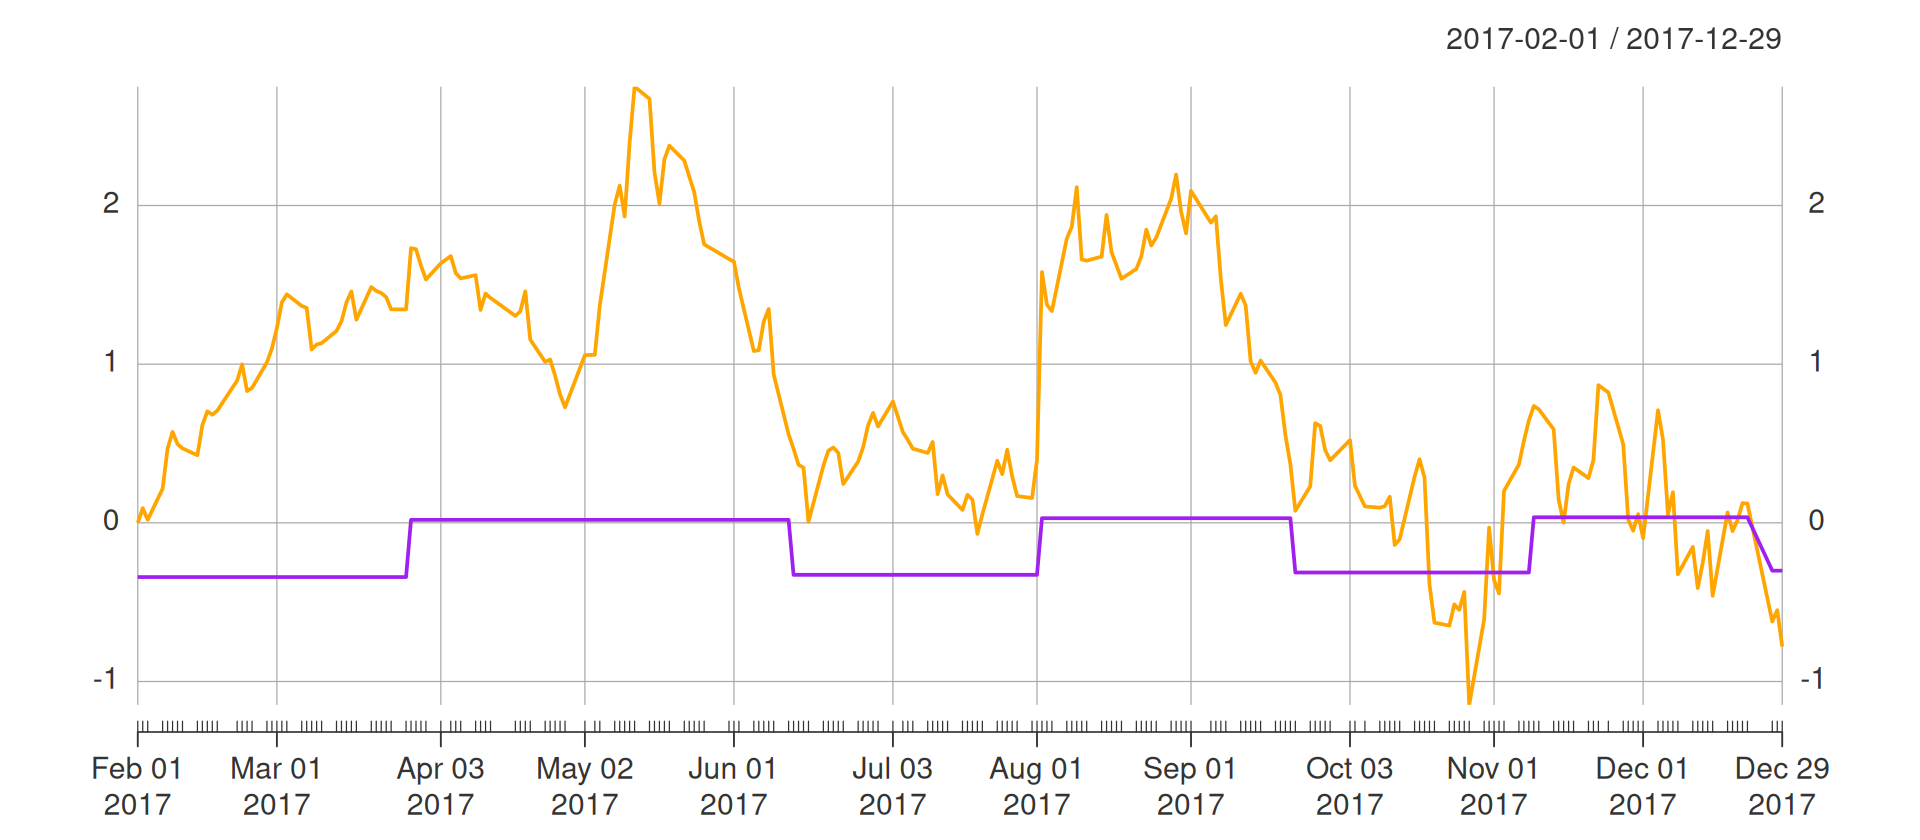

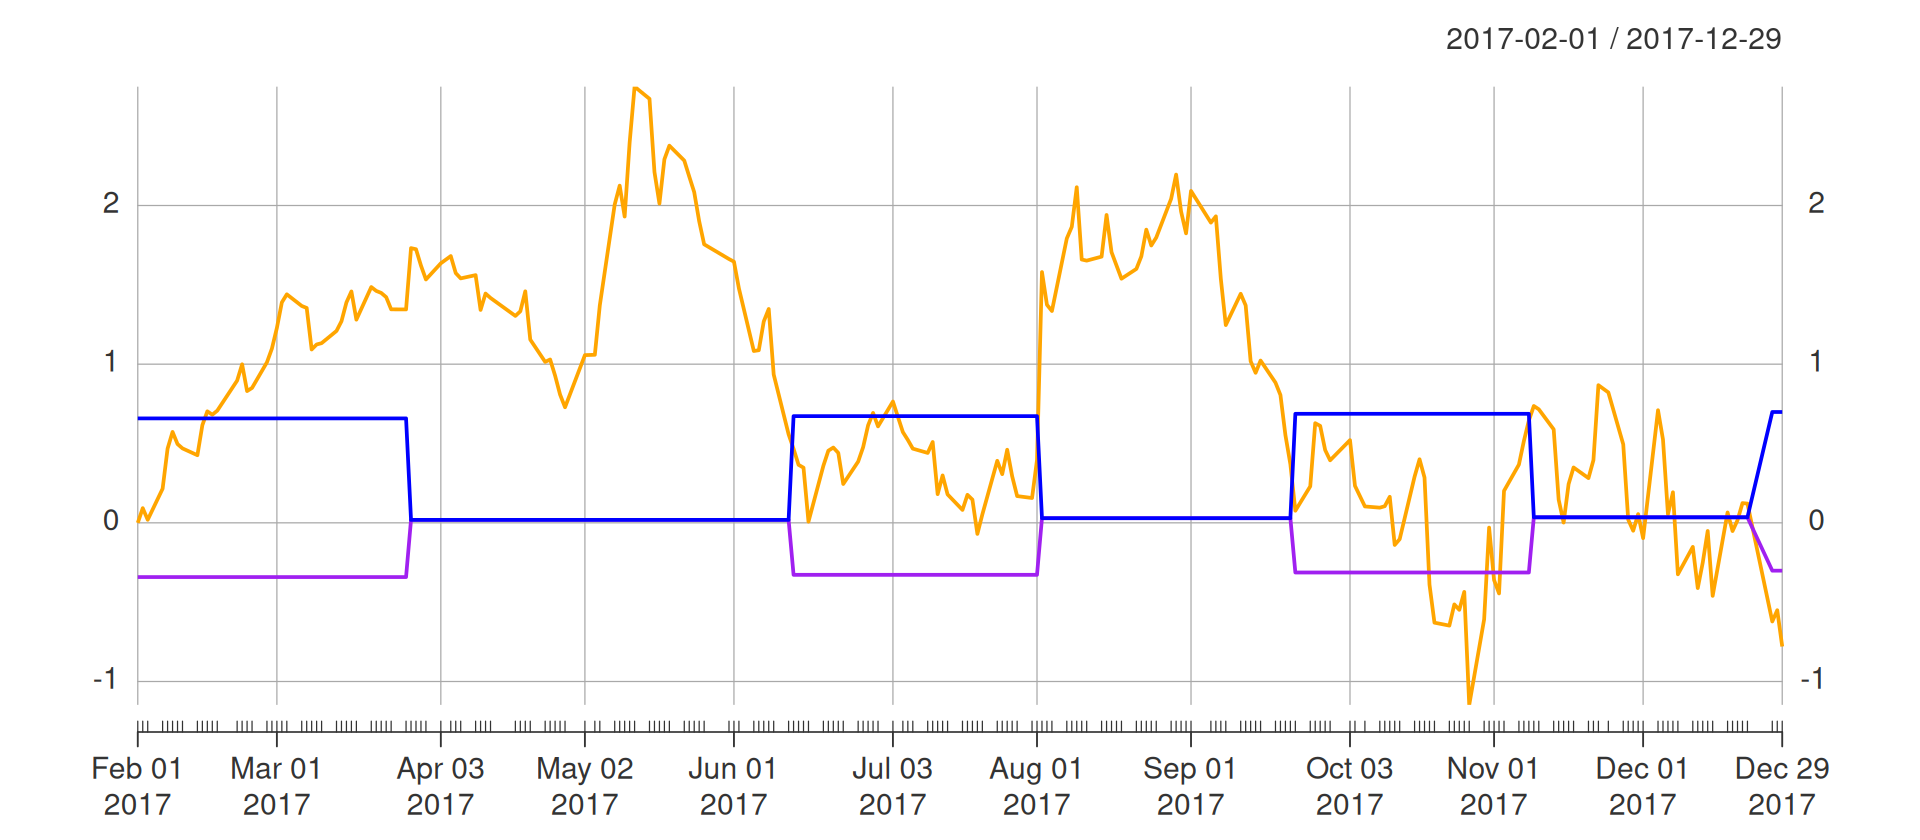

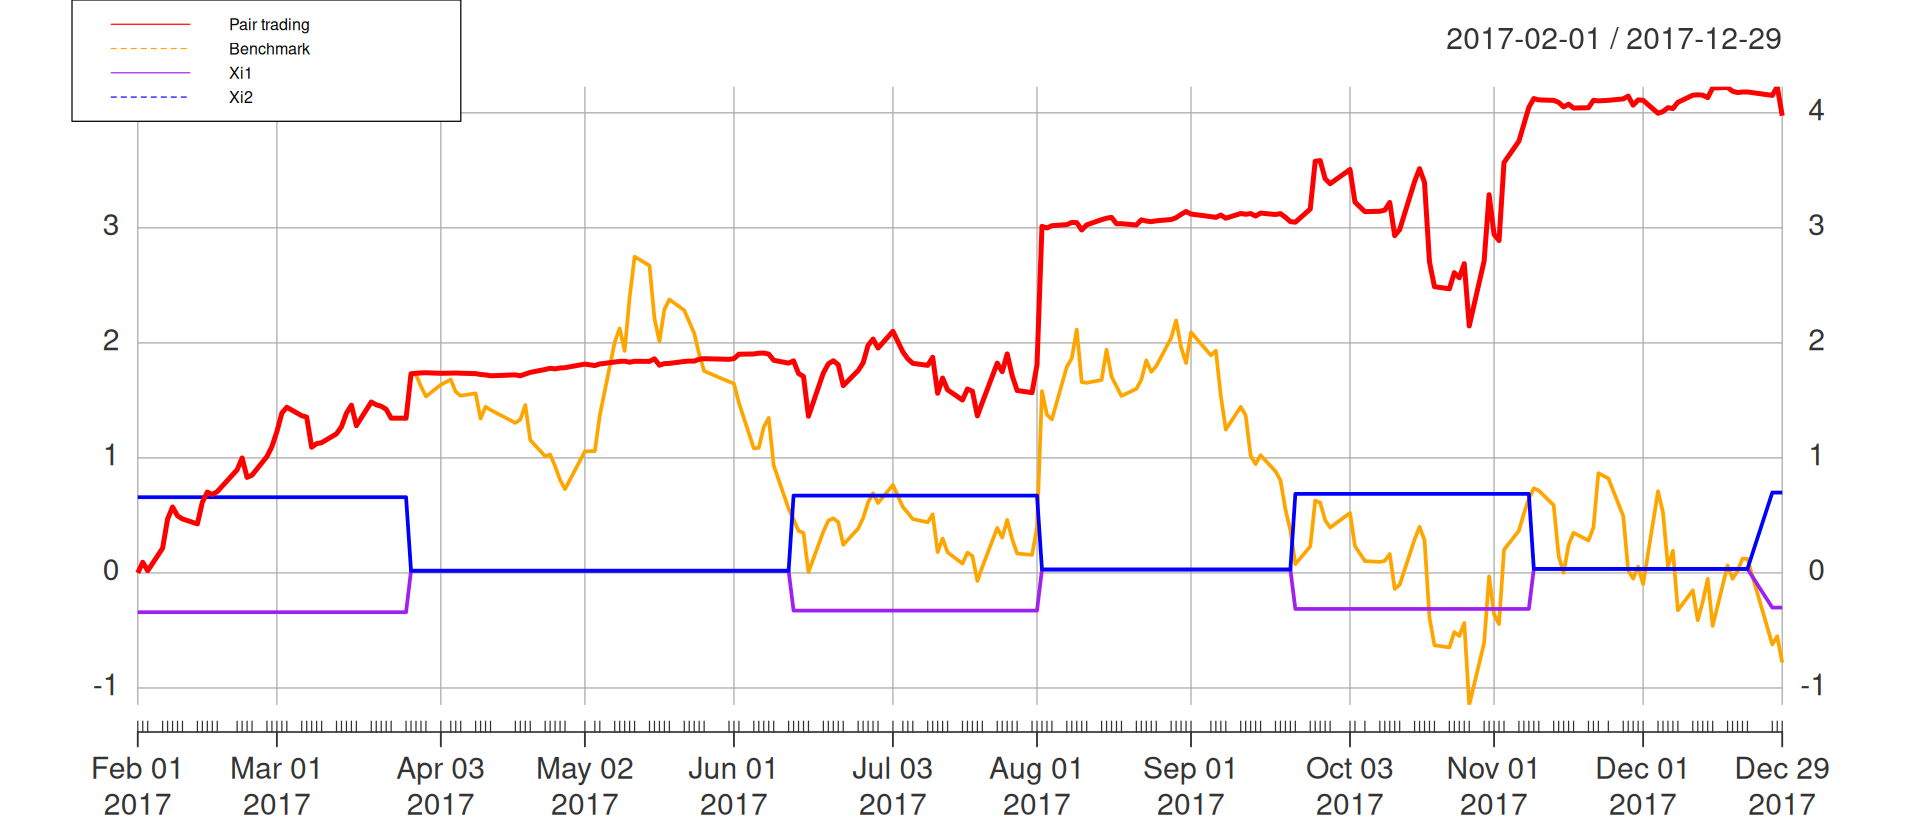

In [41]:
hdg.rtio=price.pair[,1]/price.pair[,2]; df.xi1=diff(signal)[-1]/(1+hdg.rtio)/2
df.xi2=-diff(signal)[-1]*hdg.rtio/(1+hdg.rtio)/2;xi1=cumsum(c(signal[1]/(1+hdg.rtio[1]),df.xi1))
xi2=cumsum(c(-signal[1]*hdg.rtio[1]/(1+hdg.rtio[1]),df.xi2)); # dev.new(width=12,height=7); 
portfolio=xi1*price.pair[,1]+xi2*price.pair[,2]
benchmark=as.numeric(xi1[1])*price.pair[,1]+as.numeric(xi2[1])*price.pair[,2]
plot(benchmark,col='orange',main= '', lwd= 3, cex.axis=1, cex=1, las=1)
lines(xi1,col='purple',main= "Xi1", lwd= 3, cex.axis=1, cex=2, las=1)
lines(xi2,col='blue',main= "Xi2",lwd= 3, cex.axis=1, cex=2, las=1)
lines(portfolio,col='red',main= "Portfolio performance" ,lwd= 4, cex.axis=1,cex=2,las=1)
legend("topleft", legend=c("Pair trading", "Benchmark", "Xi1", "Xi2"), col=c("red", "orange",
"purple", "blue"), lty=1:2, cex=.8,xpd=T)